#**Proyecto de Analítica de datos**
**Joaquin Rodriguez, Daniela Godoy y Natalia Sarmiento**

El siguiente proyecto tiene como propósito predecir el precio final de las 
casas (target) en Ames, Iowa a partir de una serie de variables independientes (regresoras). La base de datos cuenta con 79 variables tanto de tipo cuantitativo como cualitativo. El objetivo del proyecto es averiguar cúales de esas 79 variables explica mejor el precio de venta final de las casas. Para ello, se debe hacer una limpieza y un análisis exploratorio de los datos y aplicar el algoritmo de machine learning de regresión más conveniente.

#Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Preparación y visualización de datos

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, inplace  = True)

In [4]:
df.replace({'Y':1, 'N':0}, inplace  = True)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,3.0,3.0,1,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,4,ALQ,978,Unf,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,1,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,1,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,1,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape 

(1460, 81)

In [7]:
df.tail 

<bound method NDFrame.tail of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Datos faltantes 
df.isna().sum().sum()

6965

In [10]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [11]:
df['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [12]:
df['PoolQC'].isna().sum()

1453

In [13]:
df['GarageQual'].value_counts()

3.0    1311
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64

In [14]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [15]:
df['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

In [16]:
pd.set_option('display.max_rows', df.isna().sum().shape[0]+1)
print(df.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
pd.set_option('display.max_rows', df.isna().mean().shape[0]+1)
print(df.isna().mean())

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [18]:
df.corr(method="pearson")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,0.005039,0.029860,-0.041261,0.012356,-0.005024,-0.005968,-0.007940,-0.015415,-0.015001,0.009821,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.027052,0.000072,0.016570,0.017634,0.003646,-0.013292,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.269719,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,0.016178,-0.064686,0.080763,-0.005129,-0.069836,-0.065649,-0.140759,-0.238518,-0.019458,-0.101774,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.045569,-0.035341,0.085072,-0.040110,-0.098672,0.023819,-0.029774,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,0.635001,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.178993,-0.017264,0.172627,0.049283,0.233633,0.049900,0.132644,0.392075,0.098509,0.071659,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.181839,0.352096,0.266639,0.082773,0.070250,0.285691,0.344997,0.055362,0.042019,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.493435,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.055570,0.014732,0.077951,0.028082,0.214103,0.111170,-0.002618,0.260833,0.003581,0.049755,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.038174,-0.024947,0.154871,0.180403,0.028744,0.018842,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.236740,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.726278,0.013953,0.664650,0.177320,0.239666,-0.059119,0.308159,0.537808,0.457083,0.272038,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.355867,0.547766,0.600671,0.562022,0.143944,0.127725,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.523912,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.138942,0.389163,-0.289654,0.120140,-0.046231,0.040229,-0.136841,-0.171098,-0.014105,0.118969,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0.023820,-0.019900,-0.324297,-0.185758,-0.151521,0.031460,0.024681,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.291937,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.598160,-0.103925,0.725563,0.226569,0.249503,-0.049107,0.149040,0.391452,0.448855,0.381831,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.530165,0.095589,0.147716,0.067656,0.825667,0.537850,0.478954,0.219243,0.236921,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.197440,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.587318,0.074745,0.569555,0.140105,0.128451,-0.067759,0.181133,0.291066,0.550017,0.298878,0.240379,0.140024,-0.06

In [19]:
df.corr(method="spearman")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,0.009122,0.026785,-0.038968,0.008765,-0.013038,-0.006736,-0.009509,-0.033187,-0.010527,0.009821,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,0.016937,0.025888,-0.013644,0.023425,-0.000194,0.013301,0.006505,0.003827,-0.016135,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.283473,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,0.051457,-0.040691,0.116771,0.008057,-0.107629,-0.083871,-0.117603,-0.318897,-0.005643,-0.107115,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.021901,0.165825,0.019480,-0.057535,0.079268,0.024226,-0.047133,0.010160,-0.035165,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,0.396059,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.181257,-0.031654,0.176764,0.066438,0.154014,0.052516,0.119436,0.386206,0.094480,0.110703,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.179944,0.365999,0.245315,0.032702,0.115694,0.351756,0.378052,0.082383,0.070573,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.478091,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.148995,0.032046,0.162252,0.037714,0.171995,0.072019,0.077830,0.366197,0.076633,0.106160,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.160672,0.405924,0.350198,0.072428,0.041796,0.340195,0.367153,0.067451,0.013911,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.283473,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.715988,-0.015870,0.659255,0.159409,0.132957,-0.117560,0.272939,0.459915,0.473591,0.247859,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.660498,0.427806,0.420626,0.308547,0.618193,0.608756,0.541552,0.145805,0.137026,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,0.544581,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.228402,0.329091,-0.345980,0.065805,-0.011087,0.102471,-0.128270,-0.217375,-0.076913,0.098552,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.089707,-0.104919,-0.045383,-0.035919,-0.379398,-0.254763,-0.200718,0.003345,0.013109,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,-0.445566,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.678997,-0.116672,0.787868,0.208938,0.189645,-0.111692,0.139014,0.427187,0.494758,0.340951,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.597696,0.176820,0.174655,0.169994,0.890546,0.601519,0.528281,0.205252,0.199879,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.094491,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.631327,0.043496,0.587180,0.132325,0.063353,-0.126086,0.176921,0.299042,0.563356,0.275043,0.240265,0.073049,-0.06454

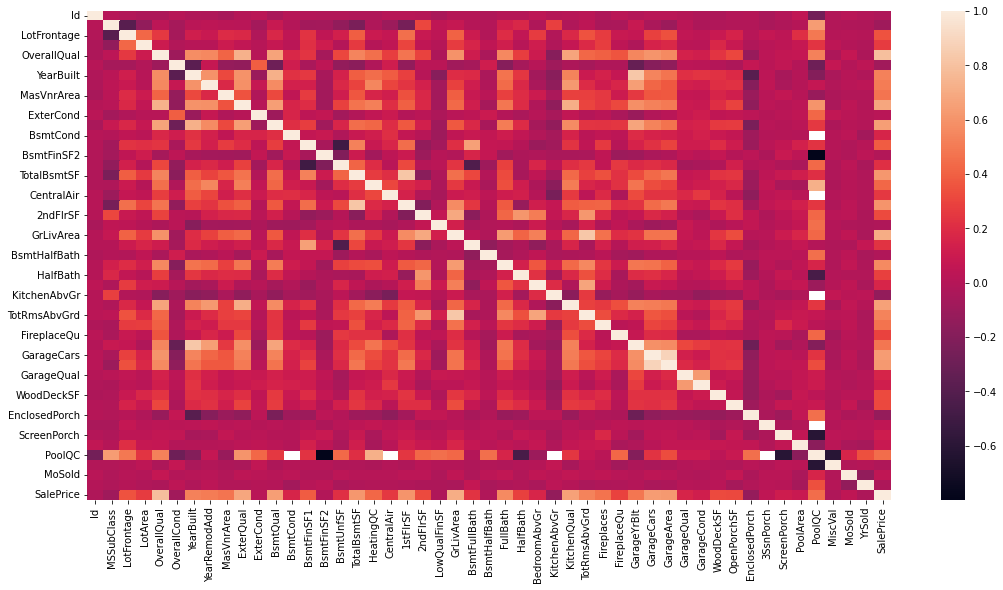

In [20]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(method="pearson"))

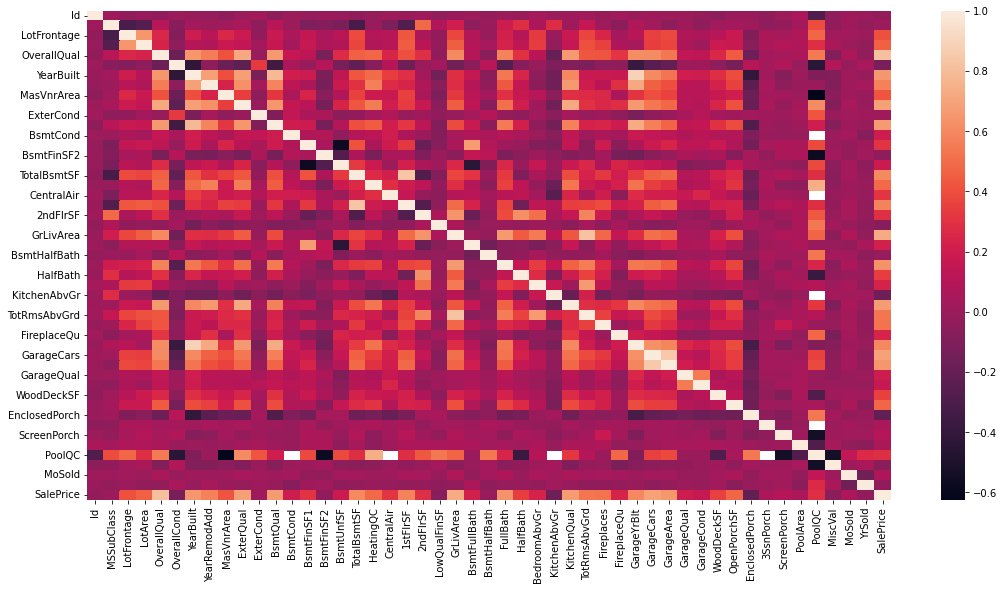

In [21]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(method="spearman"))

In [22]:
pd.DataFrame(data = df, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath']).corr(method = 'pearson')

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinSF1,2ndFlrSF,BsmtFullBath
SalePrice,1.000000,0.790982,0.708624,0.682639,0.659600,0.644019,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.386420,0.319334,0.227122
OverallQual,0.790982,1.000000,0.593007,0.726278,0.673331,0.664650,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.239666,0.295493,0.111098
GrLivArea,0.708624,0.593007,1.000000,0.435986,0.420563,0.373937,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.208171,0.687501,0.034836
ExterQual,0.682639,0.726278,0.435986,1.000000,0.716122,0.644816,0.526390,0.495778,0.470580,0.397835,0.483949,0.297903,0.598160,0.587318,0.583296,0.203777,0.179530,0.124550
KitchenQual,0.659600,0.673331,0.420563,0.716122,1.000000,0.570359,0.509810,0.489606,0.432630,0.387027,0.434648,0.287279,0.530165,0.625316,0.527013,0.228415,0.168810,0.161721
BsmtQual,0.644019,0.664650,0.373937,0.644816,0.570359,1.000000,0.529697,0.466032,0.445487,0.367399,0.504338,0.235255,0.725563,0.569555,0.670859,0.269260,0.134325,0.182392
GarageCars,0.640409,0.600671,0.467247,0.526390,0.509810,0.529697,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.224054,0.183926,0.131881
GarageArea,0.623431,0.562022,0.468997,0.495778,0.489606,0.466032,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.296970,0.138347,0.179189
TotalBsmtSF,0.613581,0.537808,0.454868,0.470580,0.432630,0.445487,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.522396,-0.174512,0.307351
1stFlrSF,0.605852,0.476224,0.566024,0.397835,0.387027,0.367399,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.445863,-0.202646,0.244671


In [23]:
pd.DataFrame(data = df, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1','2ndFlrSF','BsmtFullBath']).corr(method = 'spearman')

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinSF1,2ndFlrSF,BsmtFullBath
SalePrice,1.000000,0.809829,0.731310,0.684014,0.672849,0.664393,0.690711,0.649379,0.602725,0.575408,0.635957,0.532586,0.652682,0.571159,0.593788,0.301871,0.293598,0.225125
OverallQual,0.809829,1.000000,0.603262,0.715988,0.660498,0.659255,0.608756,0.541552,0.459915,0.408730,0.576372,0.427806,0.647392,0.557723,0.618193,0.132957,0.289561,0.098034
GrLivArea,0.731310,0.603262,1.000000,0.446430,0.427784,0.390334,0.505094,0.468211,0.371026,0.494421,0.658419,0.827874,0.288493,0.282400,0.281306,0.057471,0.642857,0.008980
ExterQual,0.684014,0.715988,0.446430,1.000000,0.725266,0.645213,0.542498,0.484655,0.423287,0.337444,0.508613,0.300065,0.678997,0.631327,0.662835,0.119676,0.171515,0.126473
KitchenQual,0.672849,0.660498,0.427784,0.725266,1.000000,0.571287,0.520308,0.484536,0.390989,0.340988,0.461394,0.285377,0.597696,0.659769,0.595487,0.153707,0.159654,0.160052
BsmtQual,0.664393,0.659255,0.390334,0.645213,0.571287,1.000000,0.565382,0.469618,0.402642,0.315761,0.546818,0.236056,0.787868,0.587180,0.730127,0.192948,0.129033,0.175690
GarageCars,0.690711,0.608756,0.505094,0.542498,0.520308,0.565382,1.000000,0.853317,0.455508,0.450580,0.518310,0.386244,0.601519,0.456245,0.630966,0.181381,0.156499,0.142808
GarageArea,0.649379,0.541552,0.468211,0.484655,0.484536,0.469618,0.853317,1.000000,0.486685,0.489797,0.444459,0.330549,0.528281,0.398267,0.591889,0.244161,0.097985,0.203277
TotalBsmtSF,0.602725,0.459915,0.371026,0.423287,0.390989,0.402642,0.455508,0.486685,1.000000,0.829292,0.328036,0.233913,0.427187,0.299042,0.338224,0.410413,-0.286087,0.301538
1stFlrSF,0.575408,0.408730,0.494421,0.337444,0.340988,0.315761,0.450580,0.489797,0.829292,1.000000,0.366891,0.361777,0.293363,0.240265,0.230299,0.323478,-0.276218,0.236083


#Limpieza de datos 

In [24]:
pd.DataFrame(data = df, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath']).isna().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
ExterQual        0
KitchenQual      0
BsmtQual        37
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
BsmtFinSF1       0
2ndFlrSF         0
BsmtFullBath     0
dtype: int64

In [25]:
df['BsmtQual'].mean()

3.5797610681658467

In [26]:
df['GarageYrBlt'].mean()

1978.5061638868744

In [27]:
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 3)

In [28]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, 1978)

In [29]:
pd.DataFrame(data = df, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath']).isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
ExterQual       0
KitchenQual     0
BsmtQual        0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
BsmtFinSF1      0
2ndFlrSF        0
BsmtFullBath    0
dtype: int64

##Precio de venta de las casas (USD$)

In [30]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Frecuencia')

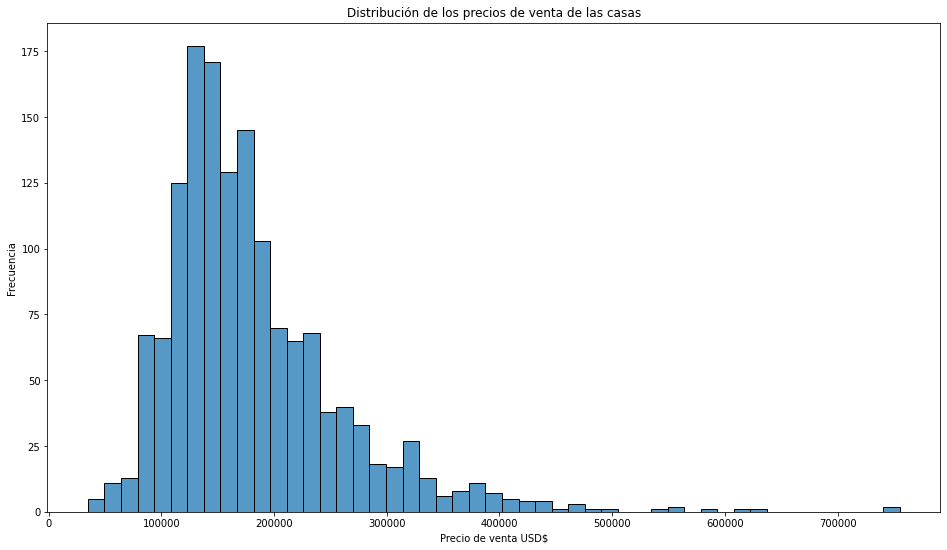

In [31]:
plt.figure(figsize=(16,9))
sns.histplot(df['SalePrice']).set_title('Distribución de los precios de venta de las casas')
plt.xlabel('Precio de venta USD$')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Precio de venta USD$')

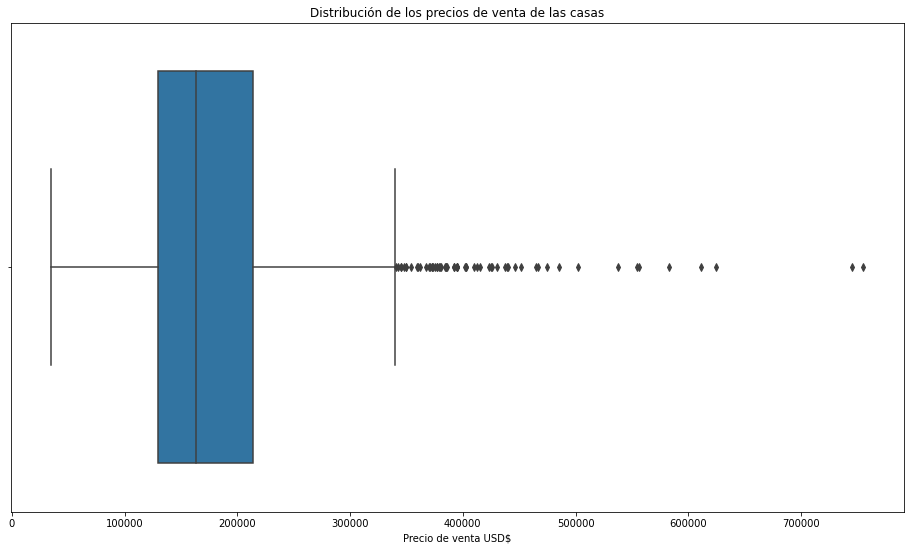

In [32]:
plt.figure(figsize=(16,9))
sns.boxplot(df['SalePrice']).set_title('Distribución de los precios de venta de las casas')
plt.xlabel('Precio de venta USD$')

In [33]:
lillieTest = stats.kstest(df['SalePrice'],'norm')
lillieTest

KstestResult(statistic=1.0, pvalue=0.0)

##Tamaño de la sala de estar (sq-feet)

In [34]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Text(0, 0.5, 'Frecuencia')

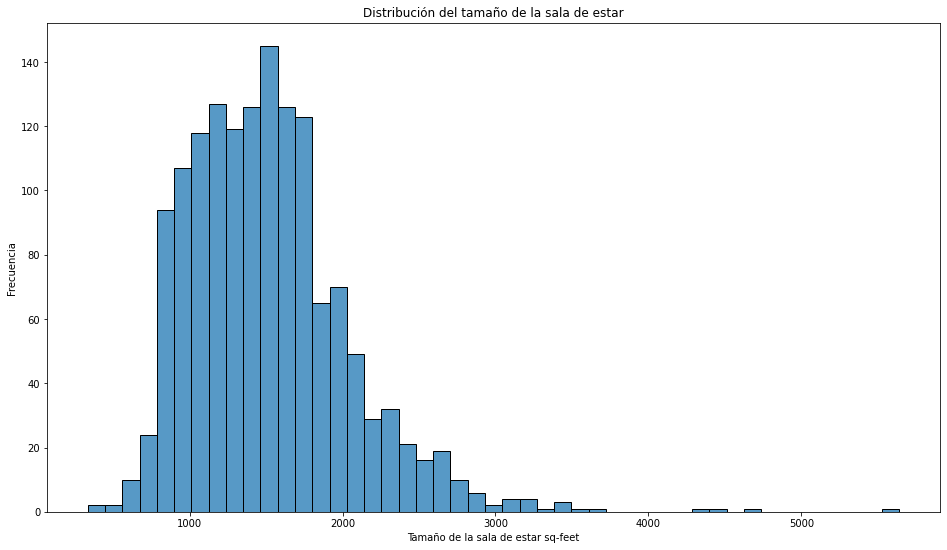

In [35]:
plt.figure(figsize=(16,9))
sns.histplot(df['GrLivArea']).set_title('Distribución del tamaño de la sala de estar')
plt.xlabel('Tamaño de la sala de estar sq-feet')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tamaño de la sala de estar sq-feet')

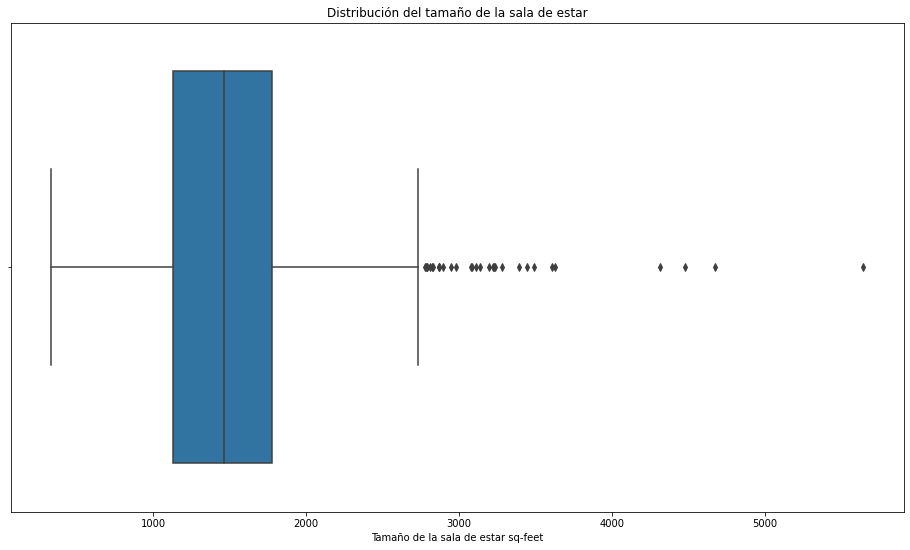

In [36]:
plt.figure(figsize=(16,9))
sns.boxplot(df['GrLivArea']).set_title('Distribución del tamaño de la sala de estar')
plt.xlabel('Tamaño de la sala de estar sq-feet')

In [37]:
lillieTest = stats.kstest(df['GrLivArea'],'norm')
lillieTest

KstestResult(statistic=1.0, pvalue=0.0)

##Área del acabado del sótano tipo 1 (sq-feet)

In [38]:
df['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

Text(0, 0.5, 'Frecuencia')

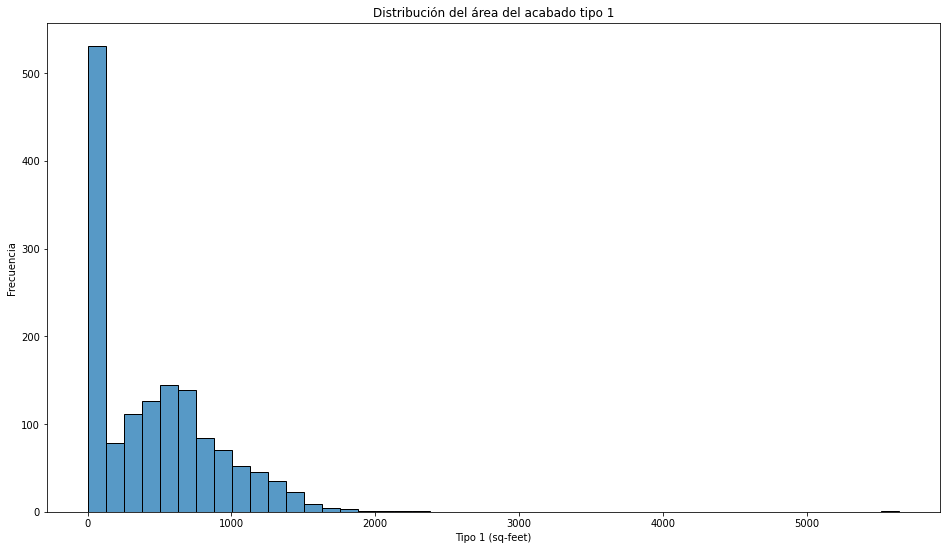

In [39]:
plt.figure(figsize=(16,9))
sns.histplot(df['BsmtFinSF1']).set_title('Distribución del área del acabado tipo 1')
plt.xlabel('Tipo 1 (sq-feet)')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tipo 1 (sq-feet)')

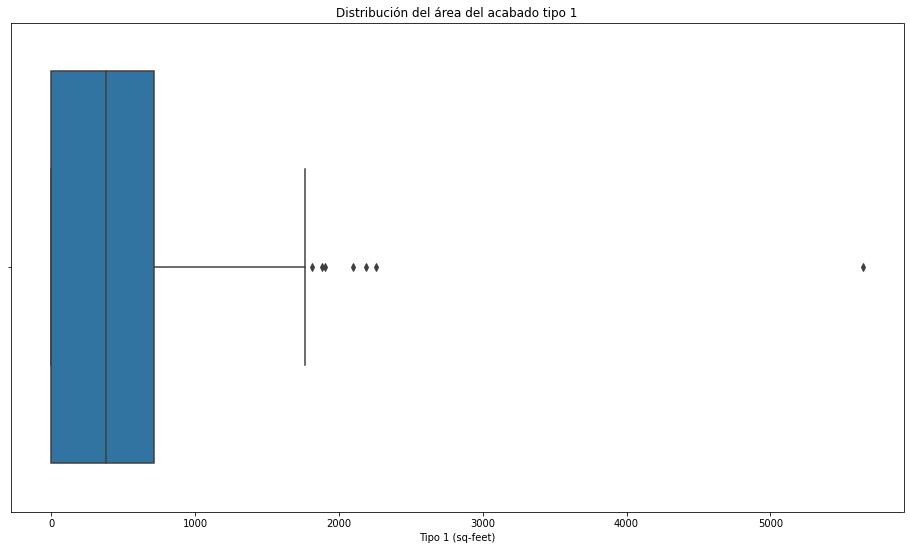

In [40]:
plt.figure(figsize=(16,9))
sns.boxplot(df['BsmtFinSF1']).set_title('Distribución del área del acabado tipo 1')
plt.xlabel('Tipo 1 (sq-feet)')

##Área (tamaño) del garage (sq-feet)

In [41]:
df['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

Text(0, 0.5, 'Frecuencia')

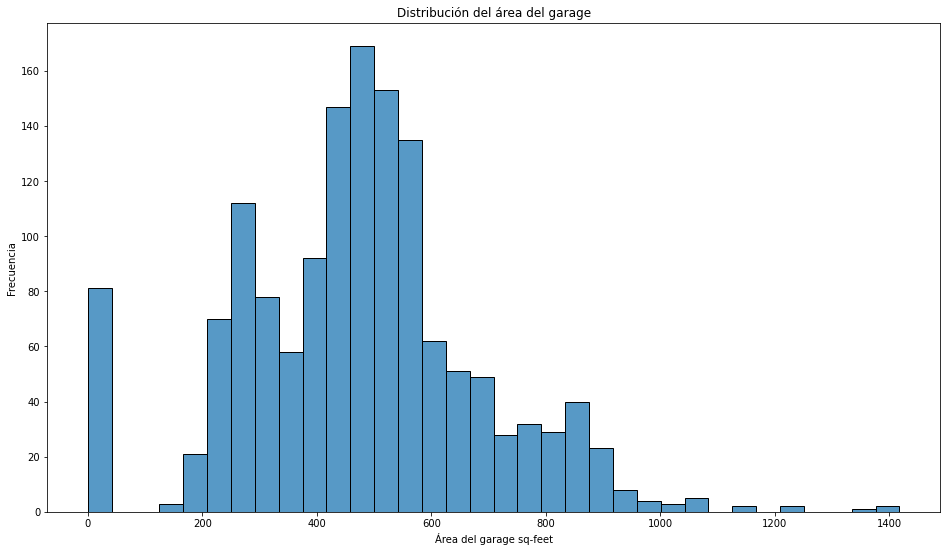

In [42]:
plt.figure(figsize=(16,9))
sns.histplot(df['GarageArea']).set_title('Distribución del área del garage')
plt.xlabel('Área del garage sq-feet')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Área del garage sq-feet')

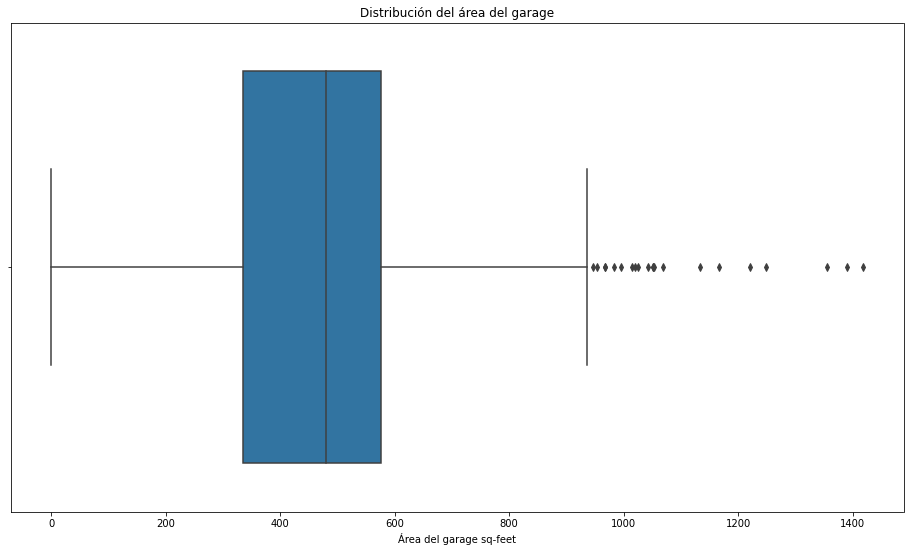

In [43]:
plt.figure(figsize=(16,9))
sns.boxplot(df['GarageArea']).set_title('Distribución del área del garage')
plt.xlabel('Área del garage sq-feet')

In [44]:
lillieTest = stats.kstest(df['GarageArea'],'norm')
lillieTest

KstestResult(statistic=0.9445205479452055, pvalue=0.0)

##Tamaño total del sótano (sq-feet)

In [45]:
df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Text(0, 0.5, 'Frecuencia')

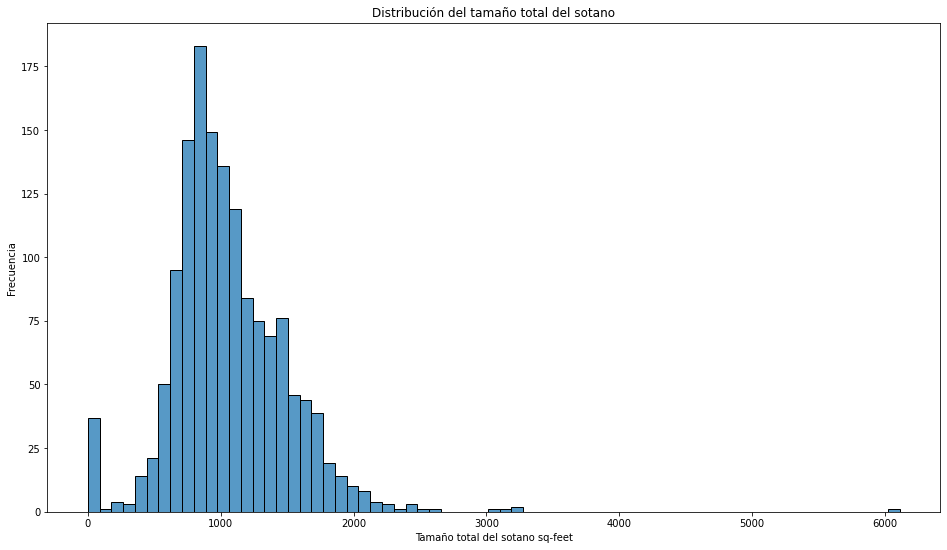

In [46]:
plt.figure(figsize=(16,9))
sns.histplot(df['TotalBsmtSF']).set_title('Distribución del tamaño total del sotano')
plt.xlabel('Tamaño total del sotano sq-feet')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tamaño total del sotano sq-feet')

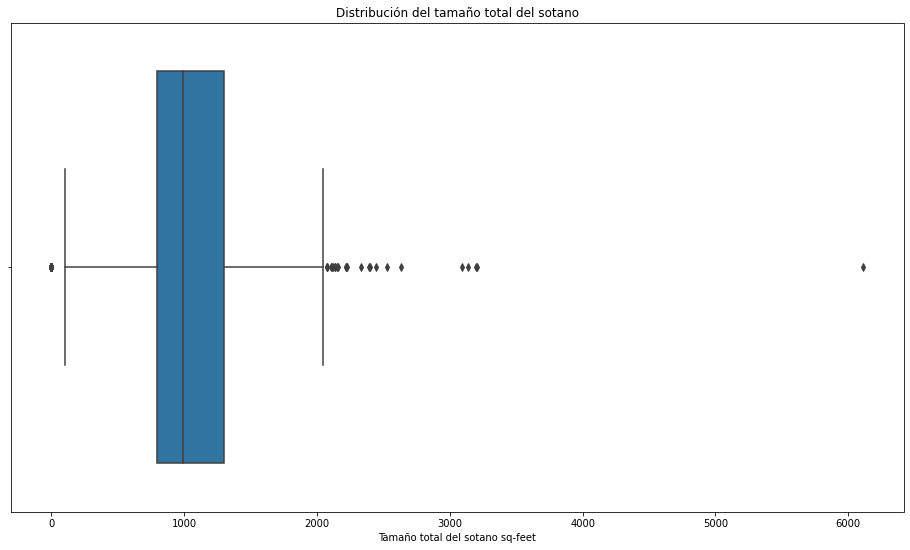

In [47]:
plt.figure(figsize=(16,9))
sns.boxplot(df['TotalBsmtSF']).set_title('Distribución del tamaño total del sotano')
plt.xlabel('Tamaño total del sotano sq-feet')

In [48]:
lillieTest = stats.kstest(df['TotalBsmtSF'],'norm')
lillieTest

KstestResult(statistic=0.9746575342465753, pvalue=0.0)

##Tamaño del primer piso (sq-feet)

In [49]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

Text(0, 0.5, 'Frecuencia')

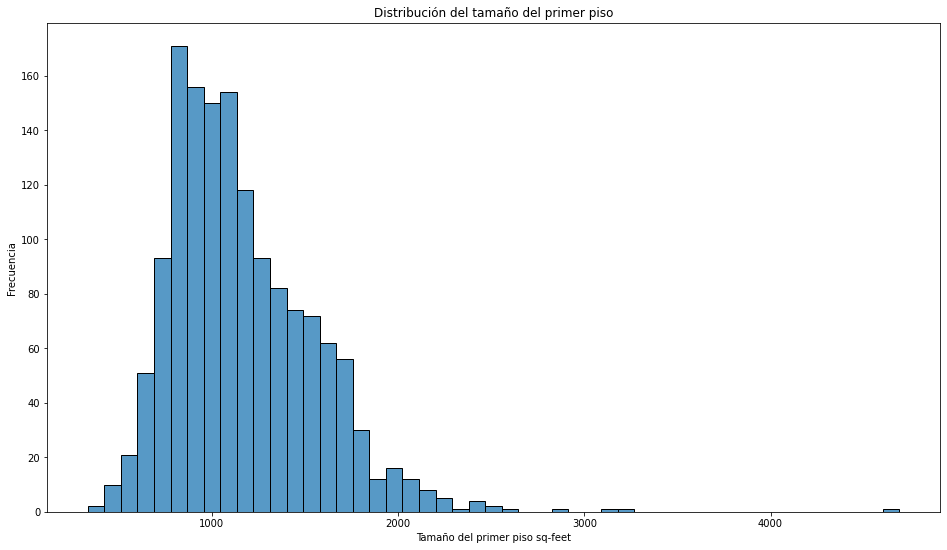

In [50]:
plt.figure(figsize=(16,9))
sns.histplot(df['1stFlrSF']).set_title('Distribución del tamaño del primer piso')
plt.xlabel('Tamaño del primer piso sq-feet')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tamaño del primer piso sq-feet')

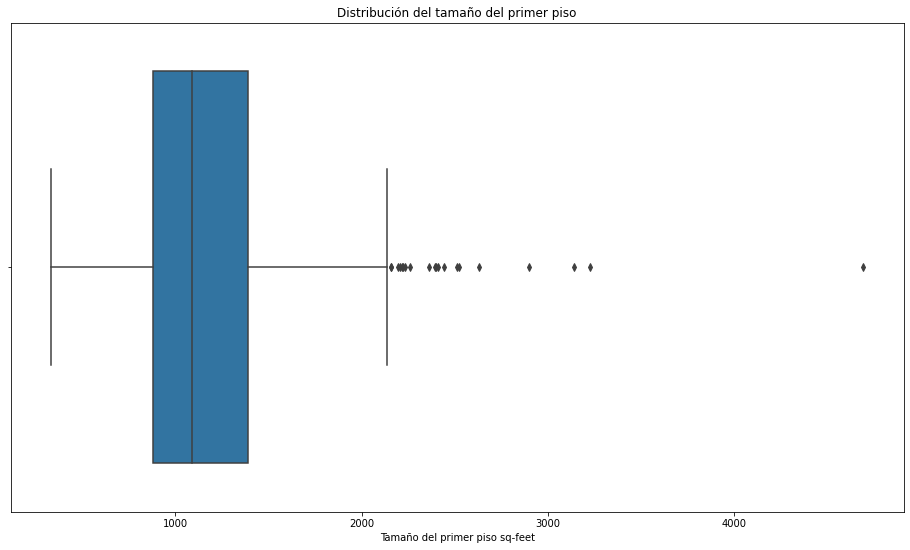

In [51]:
plt.figure(figsize=(16,9))
sns.boxplot(df['1stFlrSF']).set_title('Distribución del tamaño del primer piso')
plt.xlabel('Tamaño del primer piso sq-feet')

In [52]:
lillieTest = stats.kstest(df['1stFlrSF'],'norm')
lillieTest

KstestResult(statistic=1.0, pvalue=0.0)

##Tamaño del segundo piso (sq-feet)

In [53]:
df['2ndFlrSF'].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

Text(0, 0.5, 'Frecuencia')

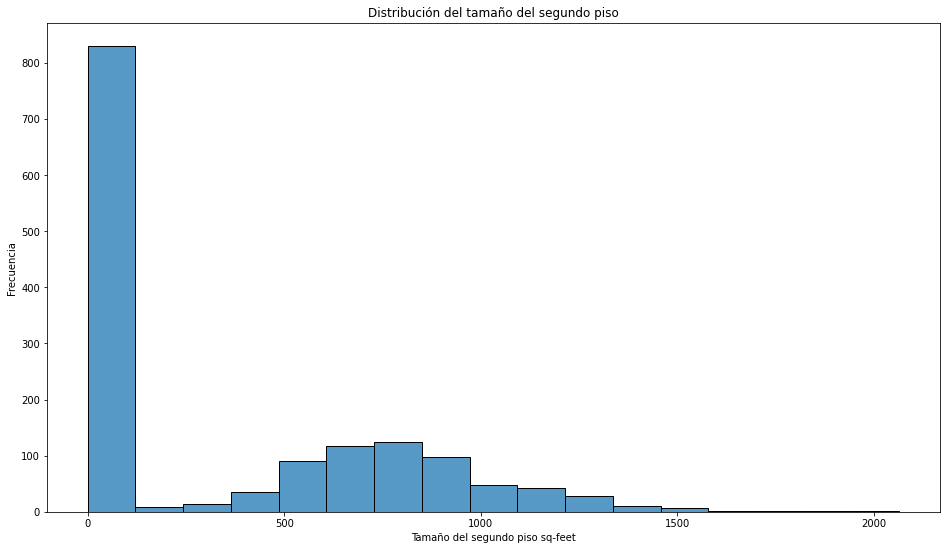

In [54]:
plt.figure(figsize=(16,9))
sns.histplot(df['2ndFlrSF']).set_title('Distribución del tamaño del segundo piso')
plt.xlabel('Tamaño del segundo piso sq-feet')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tamaño del segundo piso sq-feet')

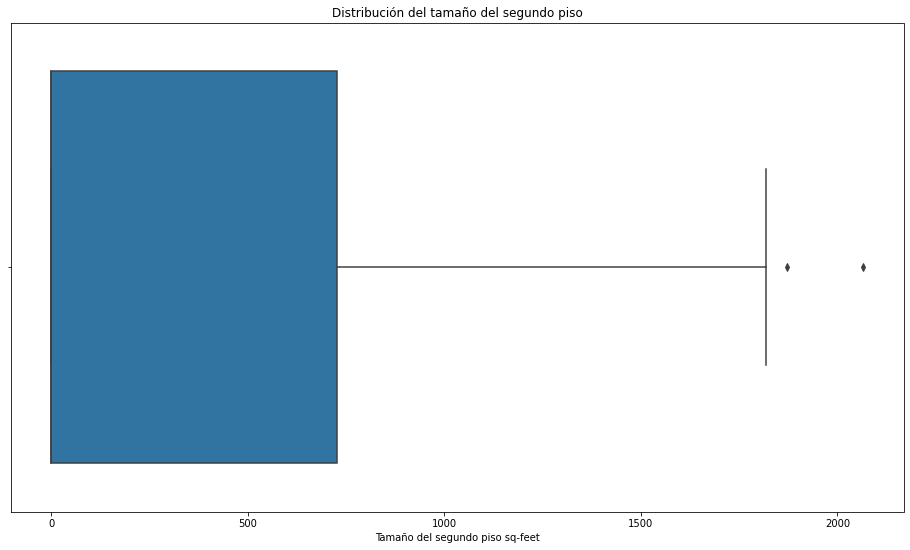

In [55]:
plt.figure(figsize=(16,9))
sns.boxplot(df['2ndFlrSF']).set_title('Distribución del tamaño del segundo piso')
plt.xlabel('Tamaño del segundo piso sq-feet')

In [56]:
lillieTest = stats.kstest(df['2ndFlrSF'],'norm')
lillieTest

KstestResult(statistic=0.5, pvalue=0.0)

Como la distribución de los datos de las variables relacionadas al área
no son normales a partir de la prueba de normalidad de Kolmogorov Smirnov, 
La eliminación de los datos atípicos se hará por medio del método del
rango intercuartílico.

##Método del rango intercuartílico

In [57]:
IQRLiving = df['GrLivArea'].quantile(0.75)-df['GrLivArea'].quantile(0.25)
IQRGarage = df['GarageArea'].quantile(0.75)-df['GarageArea'].quantile(0.25)
IQRBasement = df['TotalBsmtSF'].quantile(0.75)-df['TotalBsmtSF'].quantile(0.25)
IQRFirstF = df['1stFlrSF'].quantile(0.75)-df['1stFlrSF'].quantile(0.25)

MaxLiving = df['GrLivArea'].quantile(0.75) + IQRLiving*1.5
MinLiving = df['GrLivArea'].quantile(0.25) - IQRLiving*1.5

MaxGarage = df['GarageArea'].quantile(0.75) + IQRGarage*1.5
MinGarage = df['GarageArea'].quantile(0.25) - IQRGarage*1.5

MaxBasement = df['TotalBsmtSF'].quantile(0.75) + IQRBasement*1.5
MinBasement = df['TotalBsmtSF'].quantile(0.25) - IQRBasement*1.5

MaxFirstF = df['1stFlrSF'].quantile(0.75) + IQRFirstF*1.5
MinFirstF = df['1stFlrSF'].quantile(0.25) - IQRFirstF*1.5

df2 = df
df2 = df2.drop(df2[df2['GrLivArea']>MaxLiving].index)
df2 = df2.drop(df2[df2['GrLivArea']<MinLiving].index)

df2 = df2.drop(df2[df2['GarageArea']>MaxGarage].index)
df2 = df2.drop(df2[df2['GarageArea']<MinGarage].index)

df2 = df2.drop(df2[df2['TotalBsmtSF']>MaxBasement].index)
df2 = df2.drop(df2[df2['TotalBsmtSF']<MinBasement].index)

df2 = df2.drop(df2[df2['1stFlrSF']>MaxFirstF].index)
df2 = df2.drop(df2[df2['1stFlrSF']<MinFirstF].index)

df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,3.0,3.0,1,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,4,ALQ,978,Unf,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,1,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,1,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,1,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
df2.shape

(1355, 81)

#EDA con datos limpios

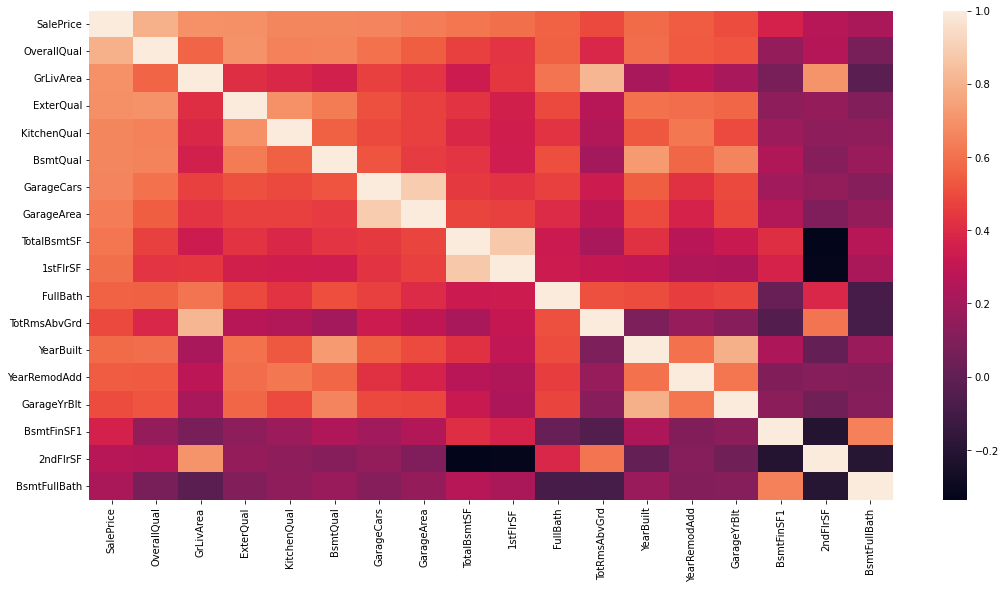

In [59]:
plt.figure(figsize=(18,9))
sns.heatmap(pd.DataFrame(data = df2, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath']).corr(method="pearson"))

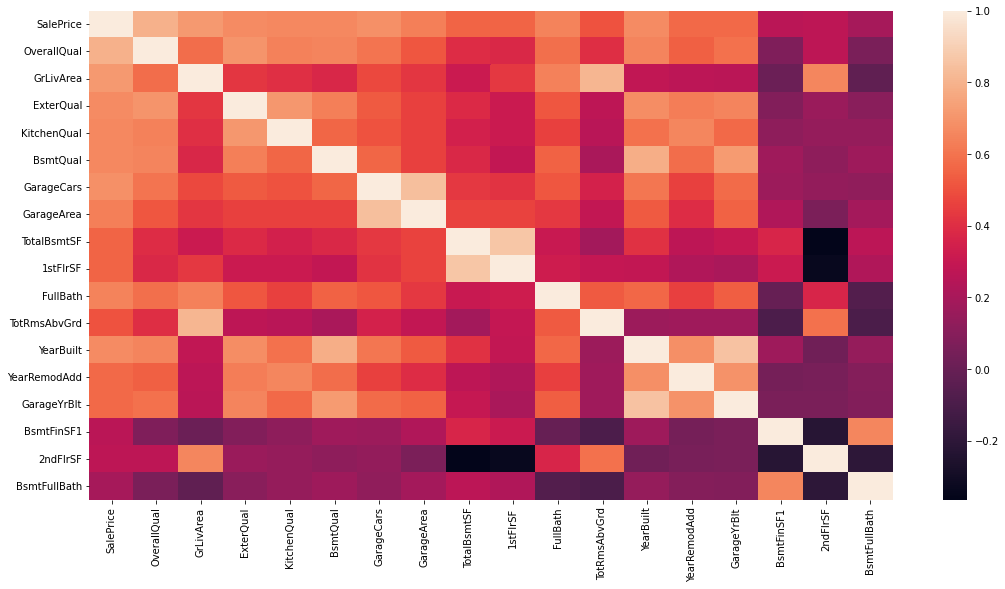

In [60]:
plt.figure(figsize=(18,9))
sns.heatmap(pd.DataFrame(data = df2, columns = ['SalePrice', 'OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath']).corr(method="spearman"))

Text(0, 0.5, 'Precio de venta USD$')

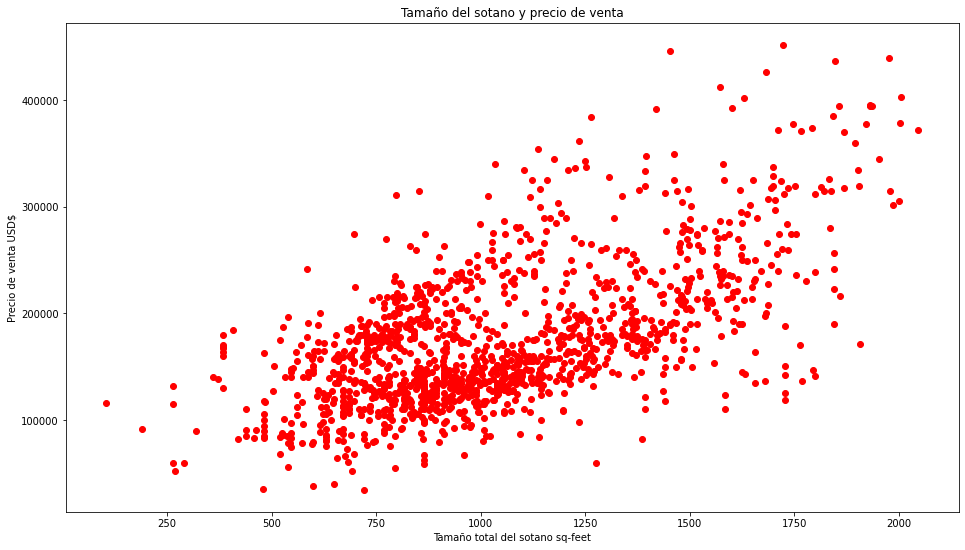

In [61]:
plt.figure(figsize=(16,9))
plt.plot(df2['TotalBsmtSF'], df2['SalePrice'],'ro')
plt.title('Tamaño del sotano y precio de venta')
plt.xlabel('Tamaño total del sotano sq-feet')
plt.ylabel('Precio de venta USD$')

In [62]:
pd.DataFrame(data = df2, columns = ['SalePrice','TotalBsmtSF']).corr(method = 'pearson')

,SalePrice,TotalBsmtSF
SalePrice,1.00000,0.61599
TotalBsmtSF,0.61599,1.00000


Text(0, 0.5, 'Precio de venta USD$')

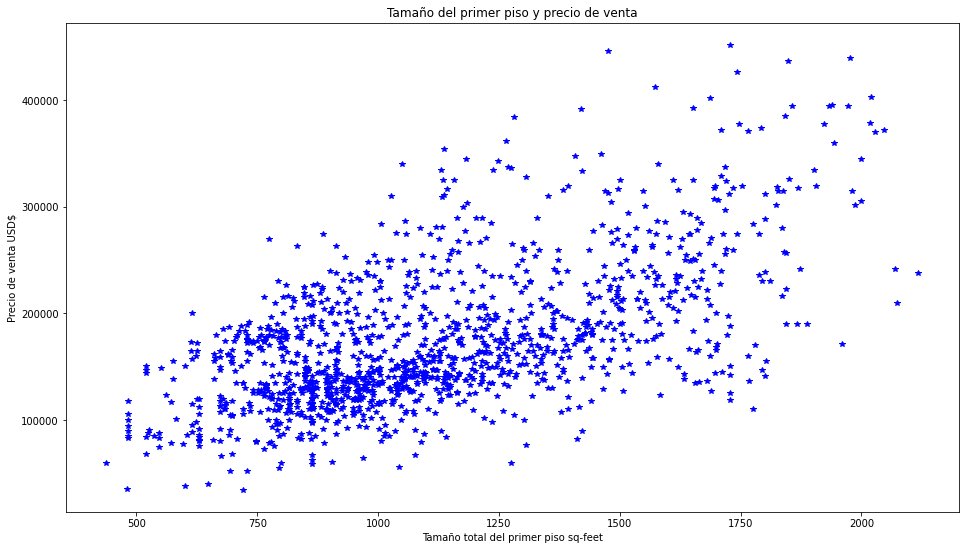

In [63]:
plt.figure(figsize=(16,9))
plt.plot(df2['1stFlrSF'], df2['SalePrice'],'b*')
plt.title('Tamaño del primer piso y precio de venta')
plt.xlabel('Tamaño total del primer piso sq-feet')
plt.ylabel('Precio de venta USD$')

In [64]:
pd.DataFrame(data = df2, columns = ['SalePrice','1stFlrSF']).corr(method = 'pearson')

,SalePrice,1stFlrSF
SalePrice,1.00000,0.59587
1stFlrSF,0.59587,1.00000


Text(0, 0.5, 'Precio de venta USD$')

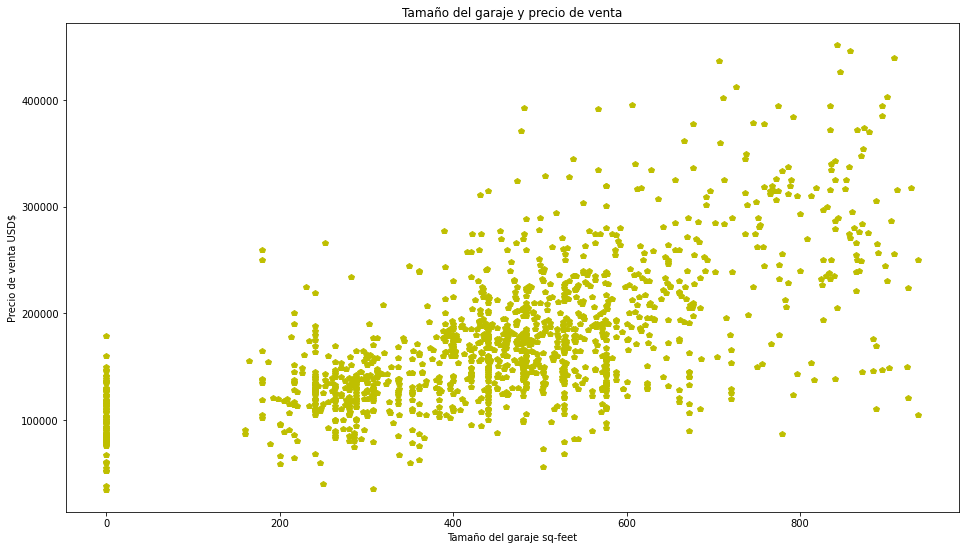

In [65]:
plt.figure(figsize=(16,9))
plt.plot(df2['GarageArea'], df2['SalePrice'],'yp')
plt.title('Tamaño del garaje y precio de venta')
plt.xlabel('Tamaño del garaje sq-feet')
plt.ylabel('Precio de venta USD$')

In [66]:
pd.DataFrame(data = df2, columns = ['SalePrice','GarageArea']).corr(method = 'pearson')

,SalePrice,GarageArea
SalePrice,1.000000,0.639142
GarageArea,0.639142,1.000000


Text(0, 0.5, 'Precio de venta USD$')

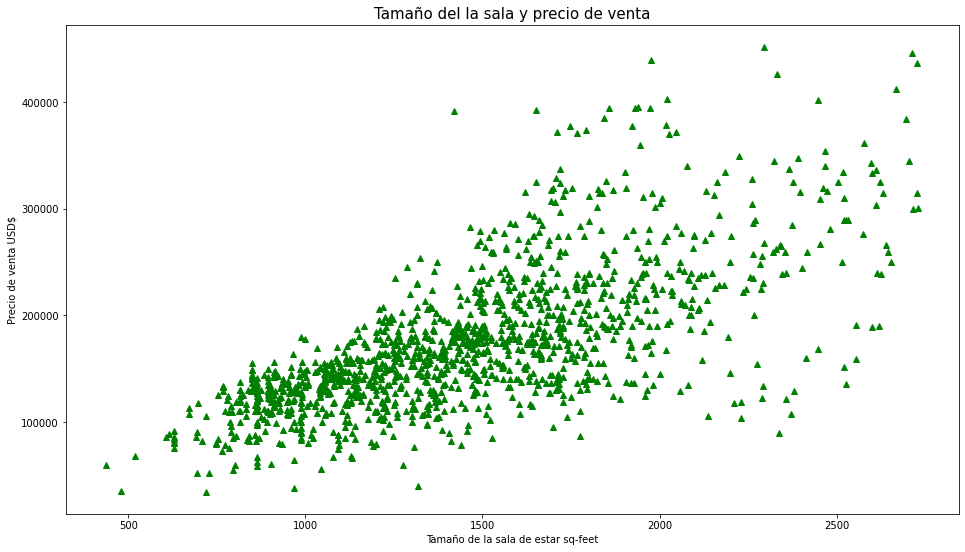

In [67]:
plt.figure(figsize=(16,9))
plt.plot(df2['GrLivArea'], df2['SalePrice'],'g^')
plt.title('Tamaño del la sala y precio de venta', fontsize=15)
plt.xlabel('Tamaño de la sala de estar sq-feet')
plt.ylabel('Precio de venta USD$')

In [68]:
pd.DataFrame(data = df2, columns = ['SalePrice','GrLivArea']).corr(method = 'pearson')

,SalePrice,GrLivArea
SalePrice,1.00000,0.69421
GrLivArea,0.69421,1.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

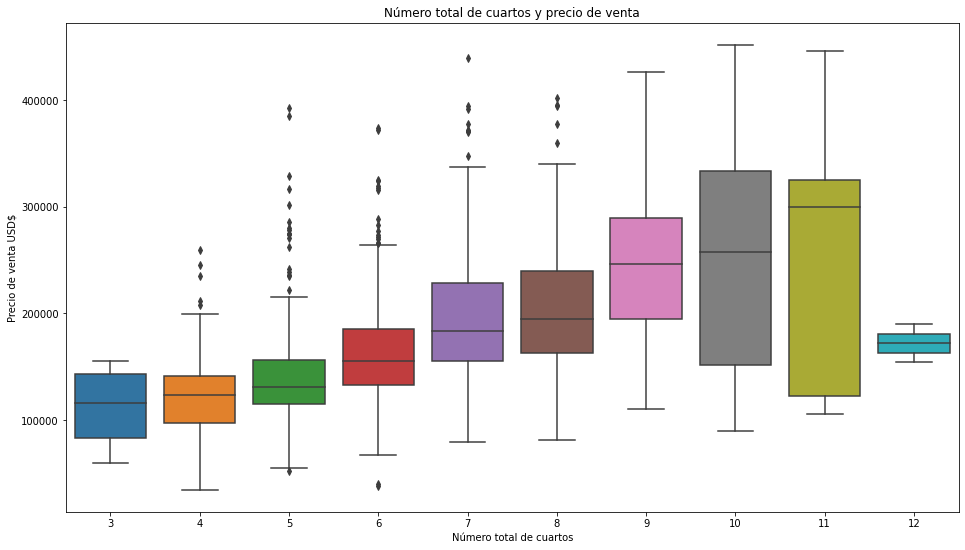

In [69]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['TotRmsAbvGrd'], df2['SalePrice'])
plt.title('Número total de cuartos y precio de venta')
plt.xlabel('Número total de cuartos')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

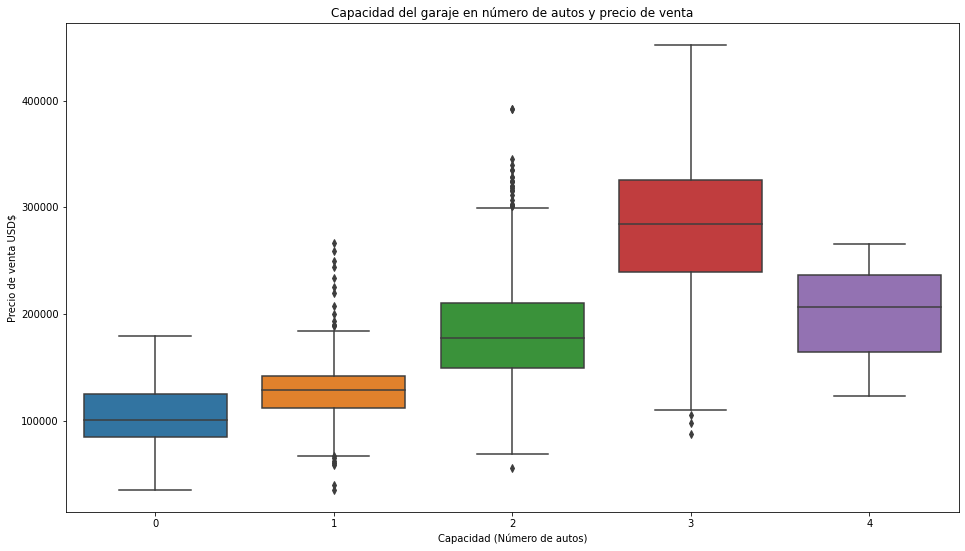

In [70]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['GarageCars'], df2['SalePrice'])
plt.title('Capacidad del garaje en número de autos y precio de venta')
plt.xlabel('Capacidad (Número de autos)')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

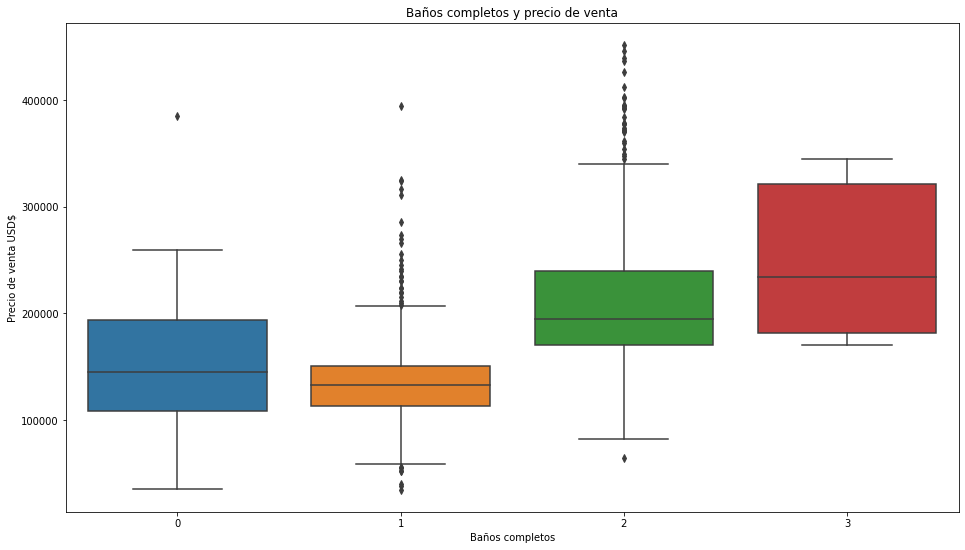

In [71]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['FullBath'], df2['SalePrice'])
plt.title('Baños completos y precio de venta')
plt.xlabel('Baños completos')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

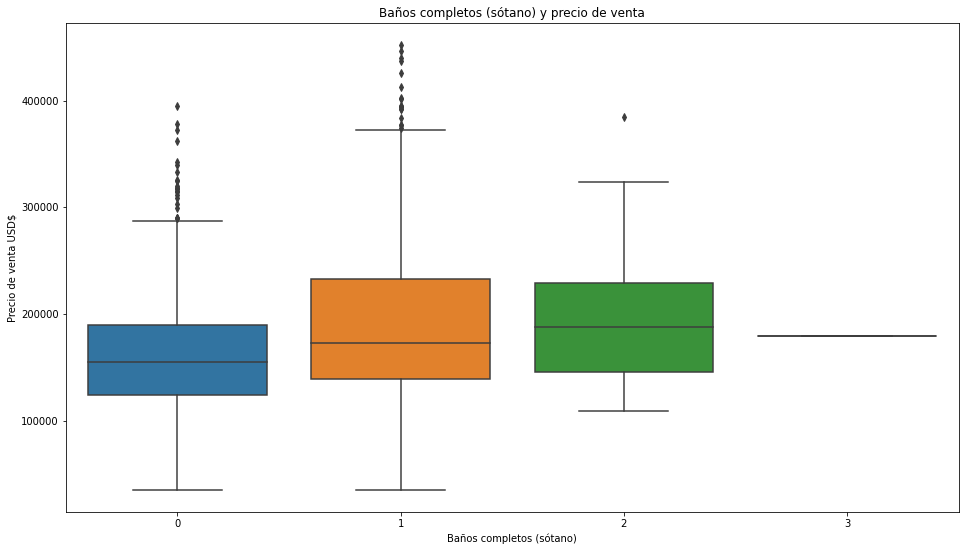

In [72]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['BsmtFullBath'], df2['SalePrice'])
plt.title('Baños completos (sótano) y precio de venta')
plt.xlabel('Baños completos (sótano)')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

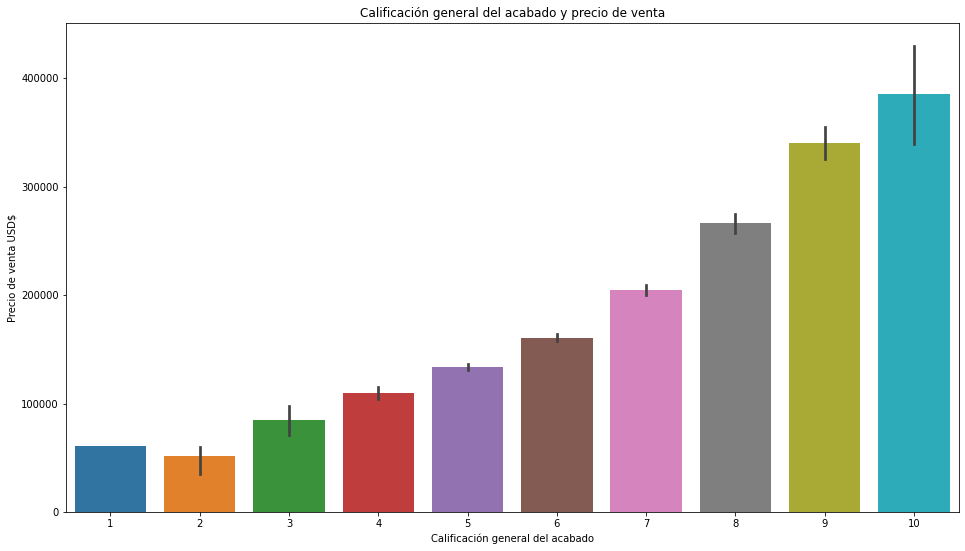

In [73]:
plt.figure(figsize=(16,9))
sns.barplot(df2['OverallQual'], df2['SalePrice'])
plt.title('Calificación general del acabado y precio de venta')
plt.xlabel('Calificación general del acabado')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

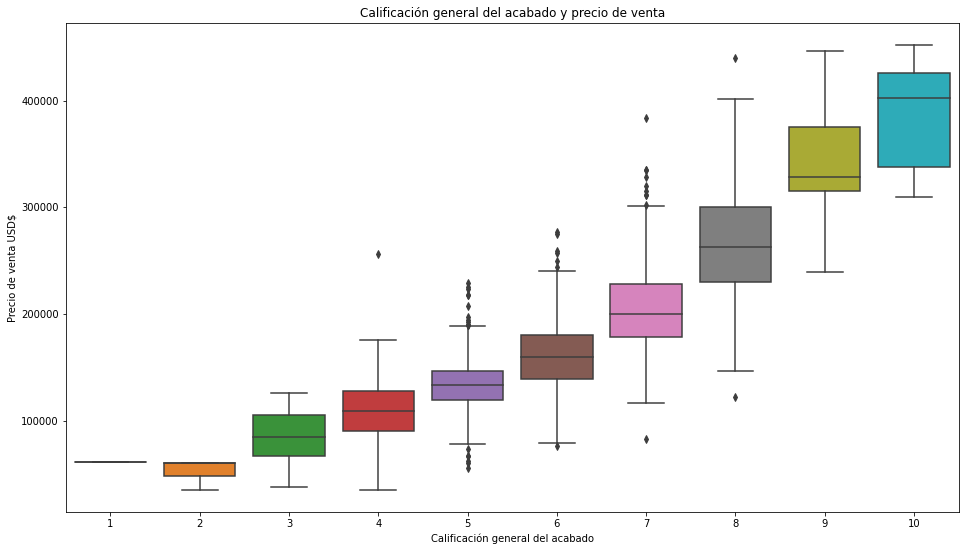

In [74]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['OverallQual'], df2['SalePrice'])
plt.title('Calificación general del acabado y precio de venta')
plt.xlabel('Calificación general del acabado')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

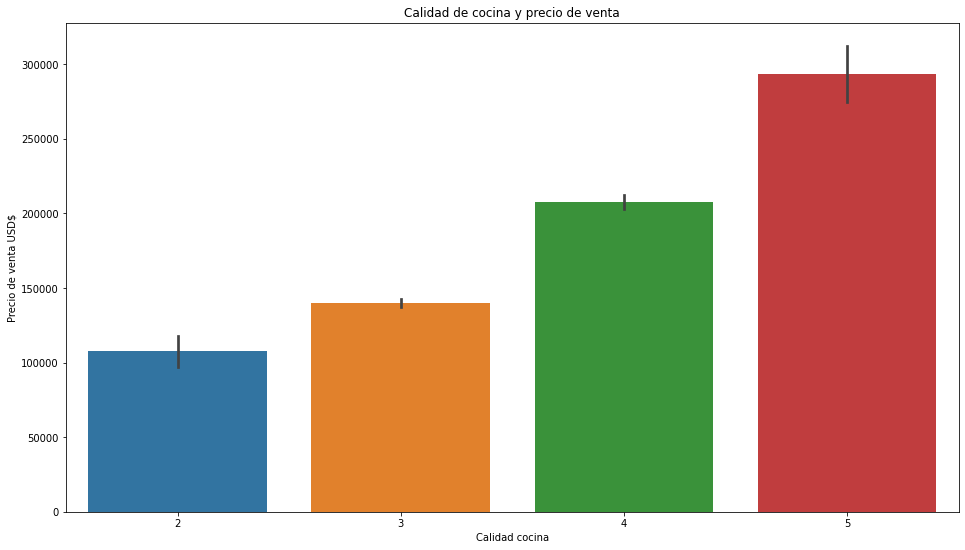

In [75]:
plt.figure(figsize=(16,9))
sns.barplot(df2['KitchenQual'], df2['SalePrice'])
plt.title('Calidad de cocina y precio de venta')
plt.xlabel('Calidad cocina')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

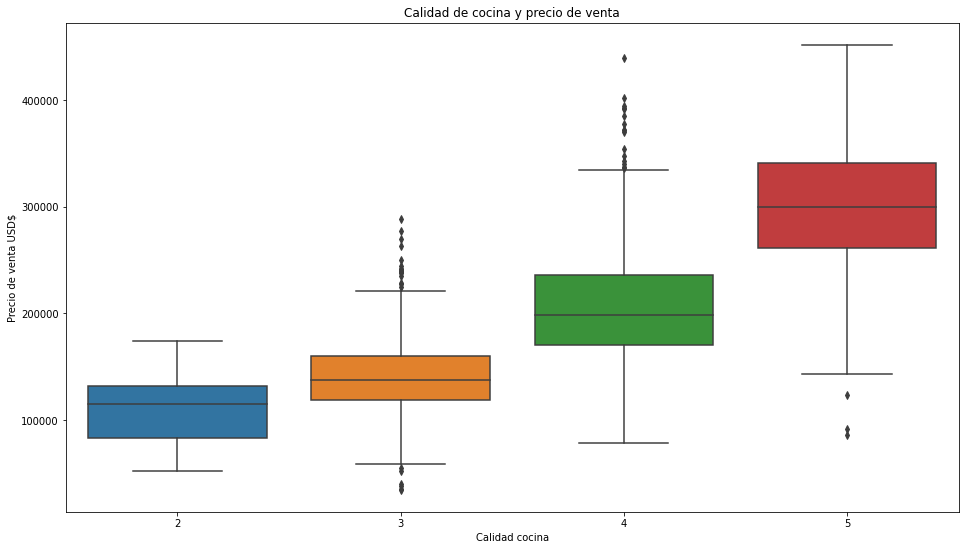

In [76]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['KitchenQual'], df2['SalePrice'])
plt.title('Calidad de cocina y precio de venta')
plt.xlabel('Calidad cocina')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

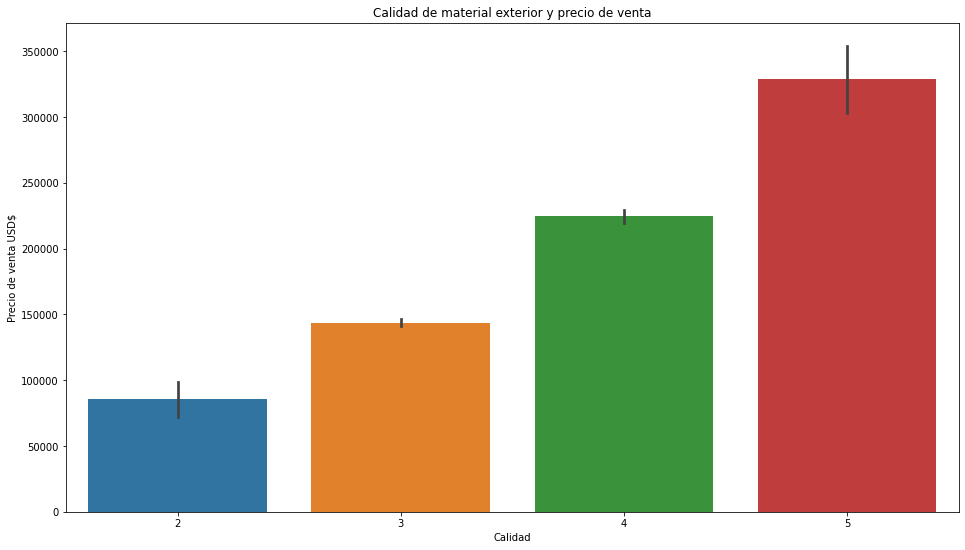

In [77]:
plt.figure(figsize=(16,9))
sns.barplot(df2['ExterQual'], df2['SalePrice'])
plt.title('Calidad de material exterior y precio de venta')
plt.xlabel('Calidad')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

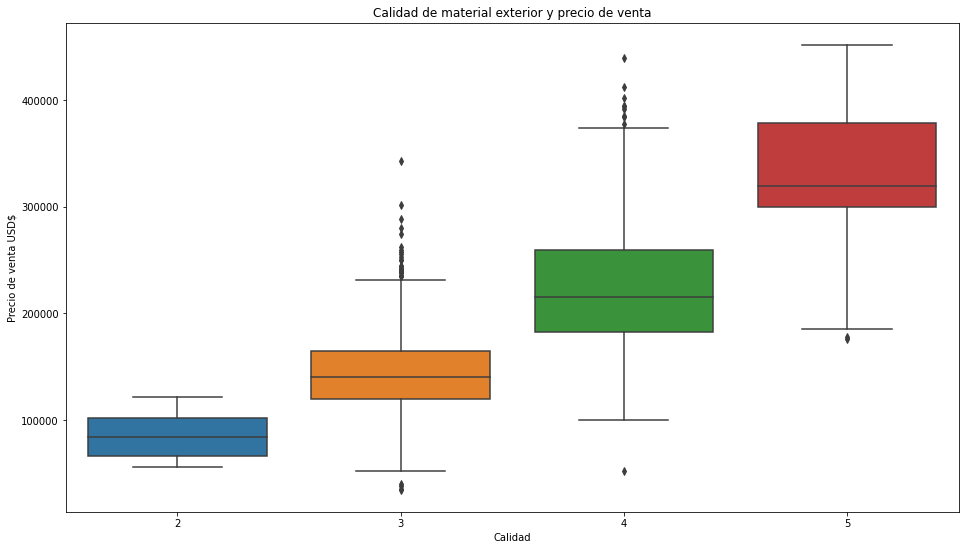

In [78]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['ExterQual'], df2['SalePrice'])
plt.title('Calidad de material exterior y precio de venta')
plt.xlabel('Calidad')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

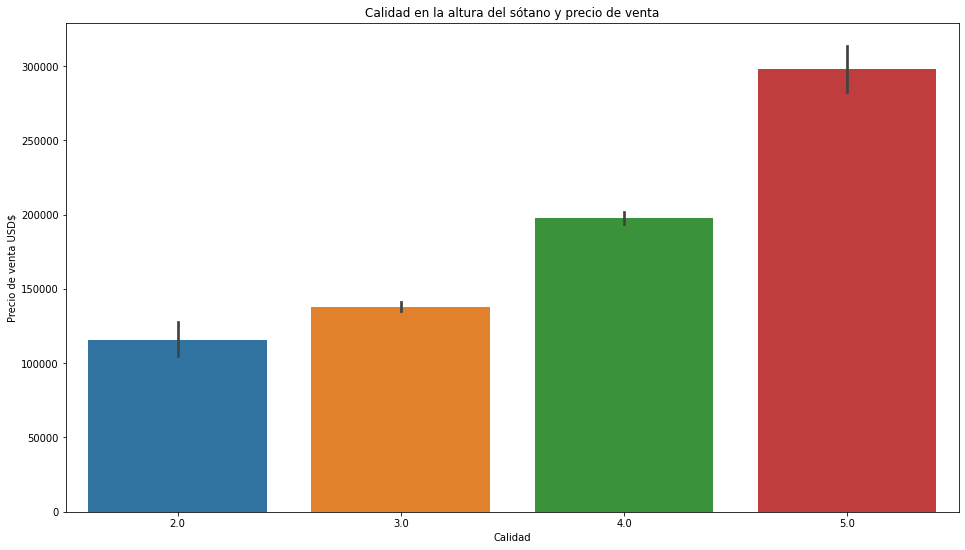

In [79]:
plt.figure(figsize=(16,9))
sns.barplot(df2['BsmtQual'], df2['SalePrice'])
plt.title('Calidad en la altura del sótano y precio de venta')
plt.xlabel('Calidad')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

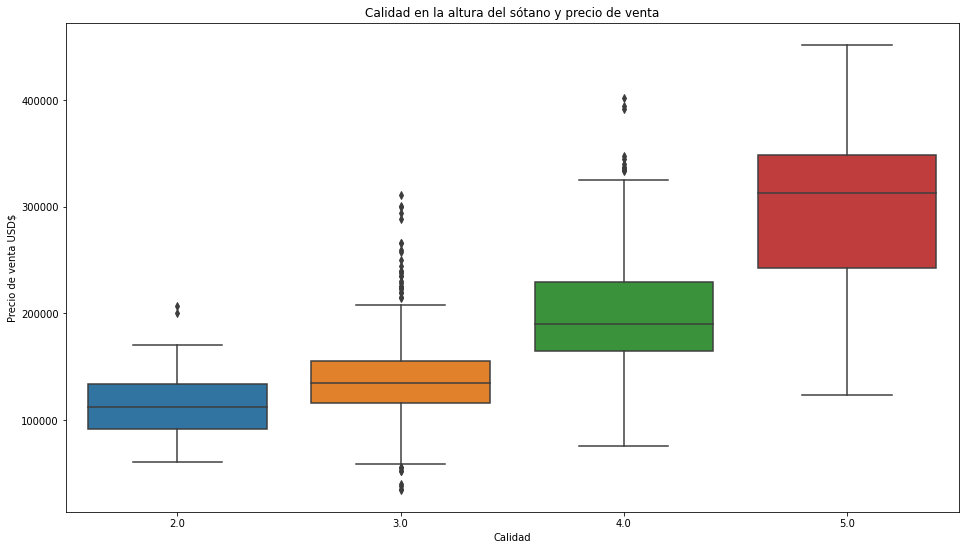

In [80]:
plt.figure(figsize=(16,9))
sns.boxplot(df2['BsmtQual'], df2['SalePrice'])
plt.title('Calidad en la altura del sótano y precio de venta')
plt.xlabel('Calidad')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

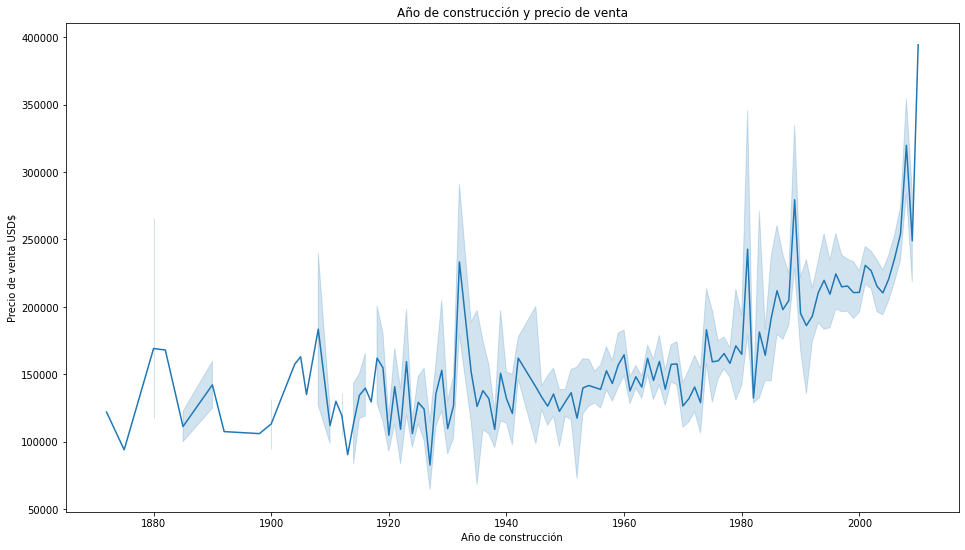

In [81]:
plt.figure(figsize=(16,9))
sns.lineplot(df2['YearBuilt'], df2['SalePrice'])
plt.title('Año de construcción y precio de venta')
plt.xlabel('Año de construcción')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

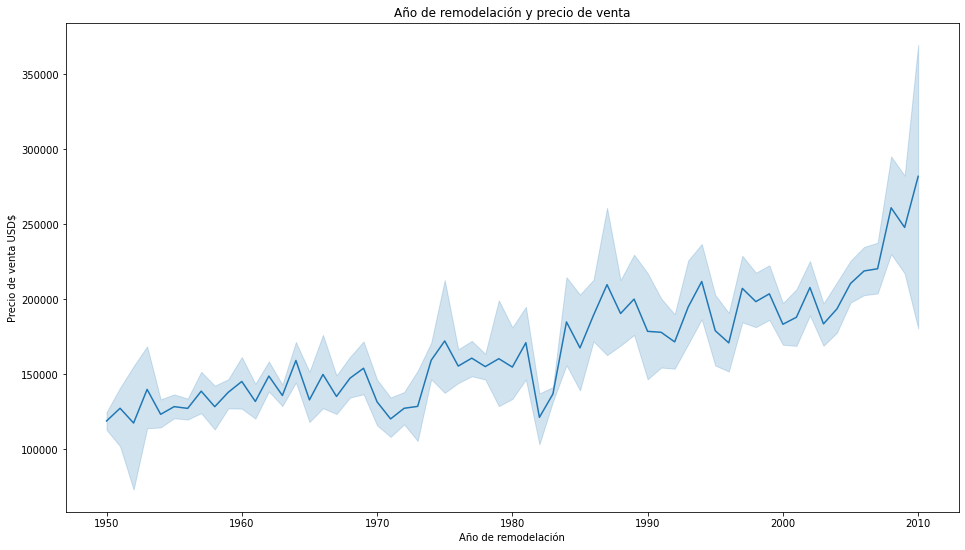

In [82]:
plt.figure(figsize=(16,9))
sns.lineplot(df2['YearRemodAdd'], df2['SalePrice'])
plt.title('Año de remodelación y precio de venta')
plt.xlabel('Año de remodelación')
plt.ylabel('Precio de venta USD$')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio de venta USD$')

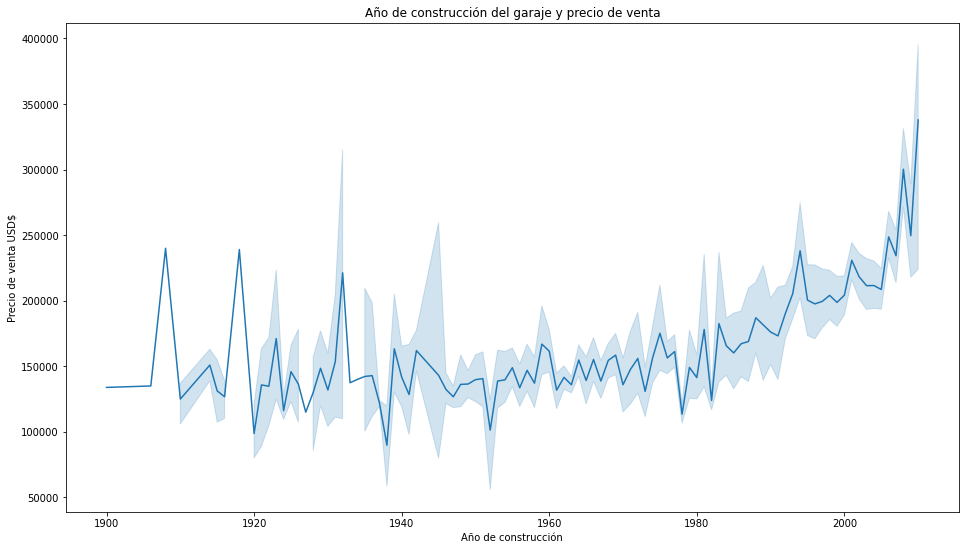

In [83]:
plt.figure(figsize=(16,9))
sns.lineplot(df2['GarageYrBlt'], df2['SalePrice'])
plt.title('Año de construcción del garaje y precio de venta')
plt.xlabel('Año de construcción')
plt.ylabel('Precio de venta USD$')

#**Modelos de machine learning para regresión**

#Regresión lineal múltiple 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [85]:
x = pd.DataFrame(data = df2, columns = ['OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath'])

In [86]:
y = df2['SalePrice']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11041999)
x_train, y_train

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1103            6       1194          3  ...         655         0             0
 494             5        886          3  ...           0         0             0
 625             6       1116          3  ...           0         0             0
 1081            5       1040          3  ...         824         0             1
 843             5       1800          3  ...           0         0             0
 ...           ...        ...        ...  ...         ...       ...           ...
 949             6       1381          3  ...         982         0             1
 745             8       2715          5  ...         575      1540             0
 779             6       1004          3  ...         975         0             1
 1220            5        912          3  ...         312         0             0
 613             5       1120          3  ...         206         0             0
 
 [1084 rows x 

In [88]:
x_test, y_test

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1085            6        996          3  ...         747         0             1
 1148            7       1111          3  ...           0       539             0
 983             8       2290          4  ...           0      1141             0
 1122            4        960          3  ...           0         0             0
 616             6       1509          4  ...         457       702             1
 ...           ...        ...        ...  ...         ...       ...           ...
 1371            6       1661          3  ...         831         0             1
 400             8       1288          4  ...         786         0             1
 657             7       1502          3  ...           0       651             0
 282             7       1314          4  ...         904         0             1
 1125            4       1005          3  ...           0         0             0
 
 [271 rows x 1

In [89]:
model = lr.fit(x_train, y_train)

In [90]:
lr.coef_ , lr.intercept_

(array([11948.18463677,    16.2237279 , 13158.45369963,  8547.14819988,
        10066.29003879,  1418.6596292 ,    29.31193604,    21.60499843,
           43.41894767, -8381.46828993,   151.74026225,   136.09929468,
          202.59934649,   -92.64338307,    21.87310029,    38.24433337,
         3214.25738043]), -617768.3224422272)

In [91]:
lr.score(x_train, y_train)

0.8587723153308681

In [92]:
y_predict = lr.predict(x_test)
y_predict

array([168918.30446104, 112831.11257127, 262829.32269795,  80637.43447917,
       188964.93074602, 154552.68736315, 143922.21652201, 103575.54111678,
       144155.157445  , 167917.45257277, 158004.60370095, 147363.97115238,
       232454.59755759, 231007.46110043, 286029.50581369, 102657.16867219,
       129050.62578159, 134457.6320745 , 133586.10997506, 213047.47673292,
       183255.56295882, 184331.02015887,  78077.42953507, 123896.83511471,
       140679.17526567, 184002.56584806, 133367.40200792, 148279.30909798,
       214696.56162175, 101972.40111192, 163713.42119498, 185943.61064062,
       266569.61827783, 249011.48320591,  60352.37220548,  89314.72018032,
       222381.07680245, 270129.19890801, 272546.26606722, 216776.93925261,
       192338.74068114, 167441.20939813, 107326.52104349, 117114.62649459,
       121278.02790417, 190304.35276176, 252399.46899487, 159877.2919821 ,
       202814.30898261,  39177.52224095, 248156.87079322, 196349.11146077,
       117900.49278444, 1

##Medidas de desempeño

In [93]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

In [94]:
def mean_absolute_percentage_error(y_test, y_predict): 
    y_test, y_predict = np.array(y_test), np.array(y_predict)
    return np.mean(np.abs((y_test - y_predict) / y_test)) * 100

In [95]:
print('MSE = '+str(mean_squared_error(y_test, y_predict)))
print('MAE = '+str(mean_absolute_error(y_test, y_predict)))
print('MedAE = '+str(median_absolute_error(y_test, y_predict)))
print('MAPE = '+str(mean_absolute_percentage_error(y_test, y_predict)))
print('R^2 = '+str(r2_score(y_test, y_predict)))

MSE = 553094653.8813732
MAE = 18047.034252187685
MedAE = 14926.038341387059
MAPE = 11.124289305139197
R^2 = 0.8559234482256399


##Supuestos del modelo de regresión lineal múltiple

In [96]:
#1) Normalidad  en los residuos (Kolmogorov-Smirnov test)
#H0: Los residuos del modelo tienen una distribución normal
#H1: Los residuos del modelo no tienen una distribución normal
error = y_test - y_predict
error

1085   -21918.304461
1148     4068.887429
983     -6929.322698
1122    31362.565521
616     -5764.930746
            ...     
1371   -28819.371787
400      6754.475834
657    -16204.953384
282    -14480.476622
1125    22641.095460
Name: SalePrice, Length: 271, dtype: float64

In [97]:
error.mean()

504.9218779810377

In [98]:
error.sum()

136833.82893286122

Text(0, 0.5, 'Frecuencia')

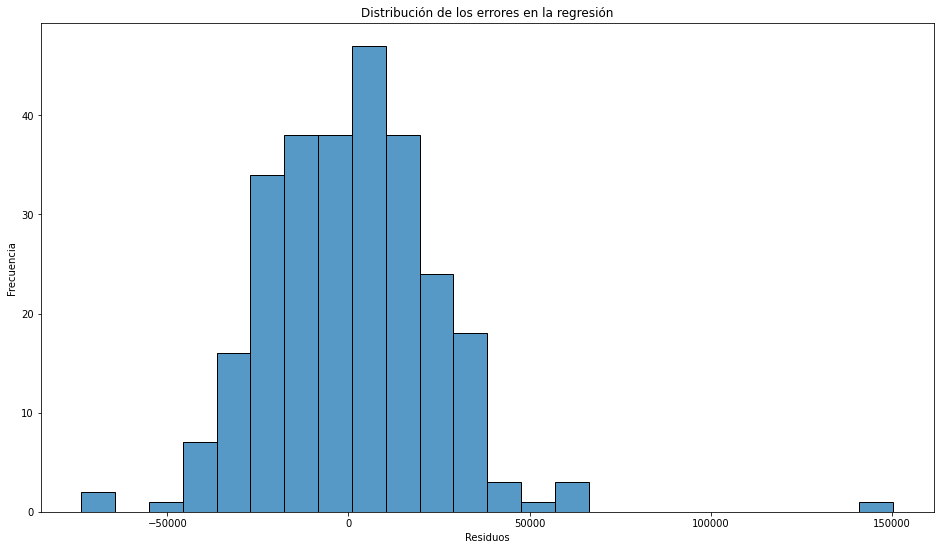

In [99]:
plt.figure(figsize=(16,9))
sns.histplot(error).set_title('Distribución de los errores en la regresión')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Residuos')

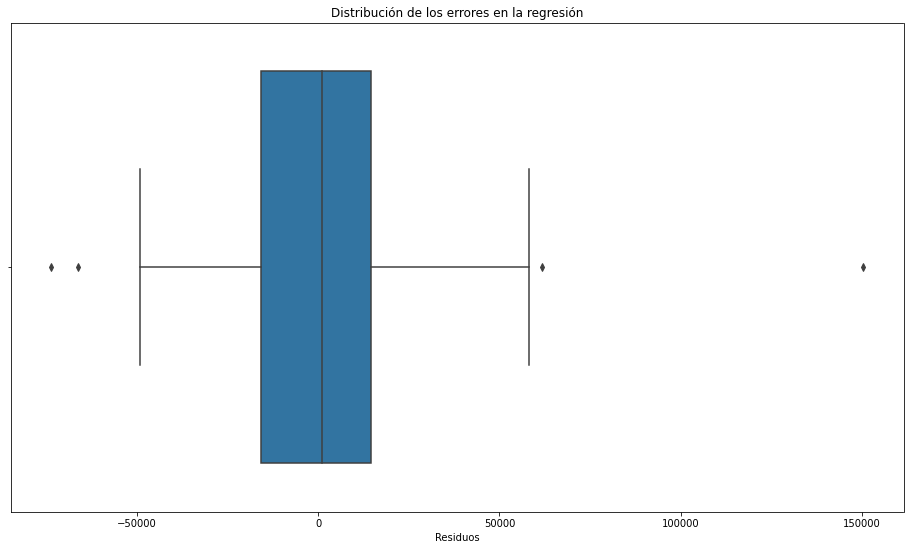

In [100]:
plt.figure(figsize=(16,9))
sns.boxplot(error).set_title('Distribución de los errores en la regresión')
plt.xlabel('Residuos')

In [101]:
lillieTestResiduals = stats.kstest(error,'norm')
lillieTestResiduals

KstestResult(statistic=0.5092250922509225, pvalue=1.111503405089277e-65)

In [102]:
#2) Homocedasticidad: Varianza constante en los residuos (Breusch-Pagan test)
#H0: Hay presencia de homocedasticidad en los residuos
#H1: Hay presencia de heterocedasticidad en los residuos
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

Text(0, 0.5, 'Error')

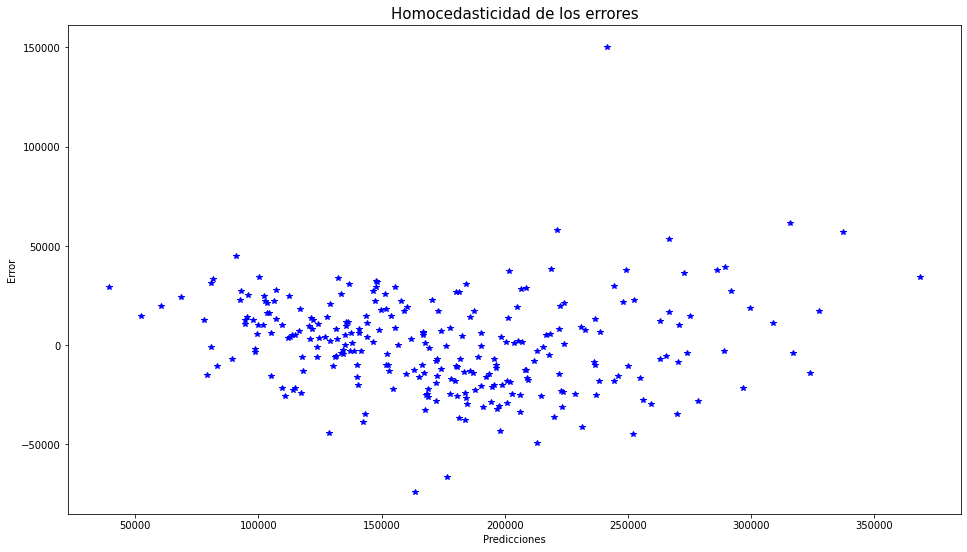

In [103]:
plt.figure(figsize=(16,9))
plt.plot(y_predict, error,'b*')
plt.title('Homocedasticidad de los errores', fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Error')

In [104]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

In [105]:
BreuschPaganTest = sms.het_breuschpagan(error, exog_het = x_test)
BreuschPaganTest
lzip(names, BreuschPaganTest)

[('Lagrange multiplier statistic', 45.6285723528416),
 ('p-value', 0.00011110473646026405),
 ('f-value', 3.024982176055385),
 ('f p-value', 8.05138159960294e-05)]

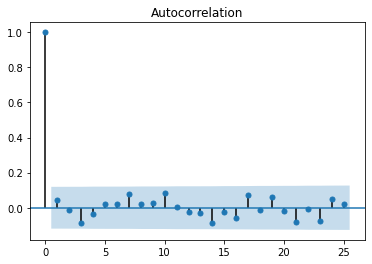

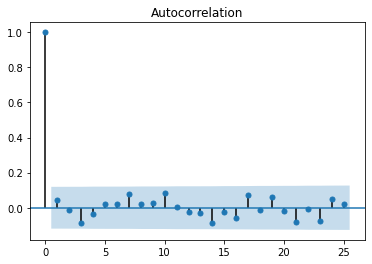

In [106]:
#3) No hay autocorrelación entre los errores del modelo: Hay independencia
#H0: Los errores no están autocorrelacionados (Independencia)
#H1: Los errores están autocorrelacionados (Dependencia)
#dw (1.5 y 2.5)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(error)

In [107]:
from statsmodels.stats.stattools import durbin_watson
DurbinWatsonTest = durbin_watson(error)
DurbinWatsonTest

1.899872967306211

#Regresión polinomial (grado 2)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [109]:
xpoli = pd.DataFrame(data = df2, columns = ['OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath'])



In [110]:
ypoli = df2["SalePrice"]

In [111]:
xpoli_train, xpoli_test, ypoli_train, ypoli_test = train_test_split(xpoli,ypoli, test_size=0.2, random_state=11041999)
xpoli_train, ypoli_train

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1103            6       1194          3  ...         655         0             0
 494             5        886          3  ...           0         0             0
 625             6       1116          3  ...           0         0             0
 1081            5       1040          3  ...         824         0             1
 843             5       1800          3  ...           0         0             0
 ...           ...        ...        ...  ...         ...       ...           ...
 949             6       1381          3  ...         982         0             1
 745             8       2715          5  ...         575      1540             0
 779             6       1004          3  ...         975         0             1
 1220            5        912          3  ...         312         0             0
 613             5       1120          3  ...         206         0             0
 
 [1084 rows x 

In [112]:
xpoli_test, ypoli_test

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1085            6        996          3  ...         747         0             1
 1148            7       1111          3  ...           0       539             0
 983             8       2290          4  ...           0      1141             0
 1122            4        960          3  ...           0         0             0
 616             6       1509          4  ...         457       702             1
 ...           ...        ...        ...  ...         ...       ...           ...
 1371            6       1661          3  ...         831         0             1
 400             8       1288          4  ...         786         0             1
 657             7       1502          3  ...           0       651             0
 282             7       1314          4  ...         904         0             1
 1125            4       1005          3  ...           0         0             0
 
 [271 rows x 1

In [113]:
pf = PolynomialFeatures(degree = 2) #Polinomio grado 2
xpoli2_train = pf.fit_transform(xpoli_train)
xpoli2_test = pf.fit_transform(xpoli_test)

In [114]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(xpoli2_train, ypoli_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
ypoli_predict = pr.predict(xpoli2_test)
ypoli_predict

array([ 154435.83846162,  114993.07969452,  281955.44694904,
        101143.71333431,  171869.823148  ,  141382.82434503,
        135297.61071219,  111036.98994594,  147561.95223613,
        136342.30435796,  145208.34282932,  144293.36944864,
        234919.3549684 ,  227266.33882663,  280302.51365267,
        112199.62821084,  135940.57434158,  110721.93781142,
        130959.51450134,  206331.6430554 ,  175497.86570242,
        203506.16384503,   90287.78911477,  133814.36075492,
        142902.96043847,  153693.68432356,  131884.24418838,
        156297.25571517,  194461.56323318,  123252.69875249,
        124095.49206207,  199350.97276727,  272842.06059619,
        251464.88502096,   87501.4094912 ,  103527.46130144,
        226647.18939598,  253121.41644565,  311870.0029646 ,
        232706.99255553,  179118.93044613,  165577.91158957,
       -386174.13131787,  133955.08108791,  131393.36408285,
        188153.43396821,  254269.33119925,  137881.75694051,
        184029.89164021,

In [116]:
pr.coef_ , pr.intercept_

(array([-3.84558330e-03, -5.65629663e+04, -4.72613296e+01,  3.82505035e+05,
         5.80558077e+05,  4.24765493e+05,  5.18392562e+05, -2.92928800e+03,
         4.52504404e+02,  1.56864330e+01, -6.53206324e+05,  3.24716711e+04,
        -4.38537807e+02, -5.59396032e+04,  2.22833206e+04,  1.21401389e+02,
        -4.37525173e+01,  2.56123051e+05, -5.02529187e+01,  6.44699242e+01,
         9.25490299e+02, -4.48039714e+03, -1.09153622e+02, -9.79335474e+02,
         9.71894645e+00,  8.16926740e+00, -6.18591613e+01, -2.71390304e+03,
         7.00571092e+02, -2.54602787e+01,  8.36117105e+01, -2.57082511e+01,
        -2.68719882e+00, -5.92737072e+01,  1.34898691e+03,  1.55764246e+00,
         1.91642453e+02, -2.70251697e+02,  7.59633510e+02,  3.88334019e+02,
        -2.05406996e+00, -4.88352875e-01, -8.59405891e-01, -2.40468723e+02,
        -4.39108648e+02, -3.00733757e+00, -2.00951488e+01,  2.20685733e+01,
         7.57736427e-01, -2.29508351e+00,  4.29504600e+02,  2.49269163e+02,
        -1.0

In [117]:
pr.score(xpoli2_train, ypoli_train)

0.9117210668991109

##Medidas de desempeño

In [118]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

In [119]:
def mean_absolute_percentage_error(ypoli_test, ypoli_predict): 
    ypoli_test, ypoli_predict = np.array(ypoli_test), np.array(ypoli_predict)
    return np.mean(np.abs((ypoli_test - ypoli_predict) / ypoli_test)) * 100

In [120]:
print('MSE = '+str(mean_squared_error(ypoli_test, ypoli_predict)))
print('MAE = '+str(mean_absolute_error(ypoli_test, ypoli_predict)))
print('MedAE = '+str(median_absolute_error(ypoli_test, ypoli_predict)))
print('MAPE = '+str(mean_absolute_percentage_error(ypoli_test, ypoli_predict)))
print('R^2 = '+str(r2_score(ypoli_test, ypoli_predict)))

MSE = 3655000341.8180494
MAE = 22258.587687829928
MedAE = 11950.282967604697
MAPE = 14.215888216976373
R^2 = 0.04790284576463055


#Decision Tree Regression

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
 Xtree = pd.DataFrame(data = df2, columns = ['OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath'])
 Xtree

,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinSF1,2ndFlrSF,BsmtFullBath
0,7,1710,4,4,4.0,2,548,856,856,2,8,2003,2003,2003.0,706,854,1
1,6,1262,3,3,4.0,2,460,1262,1262,2,6,1976,1976,1976.0,978,0,0
2,7,1786,4,4,4.0,2,608,920,920,2,6,2001,2002,2001.0,486,866,1
3,7,1717,3,4,3.0,3,642,756,961,1,7,1915,1970,1998.0,216,756,1
4,8,2198,4,4,4.0,3,836,1145,1145,2,9,2000,2000,2000.0,655,1053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,3,3,4.0,2,460,953,953,2,7,1999,2000,1999.0,0,694,0
1456,6,2073,3,3,4.0,2,500,1542,2073,2,7,1978,1988,1978.0,790,0,1
1457,7,2340,5,4,3.0,1,252,1152,1188,2,9,1941,2006,1941.0,275,1152,0
1458,5,1078,3,4,3.0,1,240,1078,1078,1,5,1950,1996,1950.0,49,0,1


In [123]:
Ytree = df2['SalePrice']
Ytree

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1355, dtype: int64

In [124]:
Xtree_train, Xtree_test, Ytree_train, Ytree_test = train_test_split(Xtree, Ytree, test_size = 0.2, random_state = 11041999)
Xtree_train, Ytree_train

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1103            6       1194          3  ...         655         0             0
 494             5        886          3  ...           0         0             0
 625             6       1116          3  ...           0         0             0
 1081            5       1040          3  ...         824         0             1
 843             5       1800          3  ...           0         0             0
 ...           ...        ...        ...  ...         ...       ...           ...
 949             6       1381          3  ...         982         0             1
 745             8       2715          5  ...         575      1540             0
 779             6       1004          3  ...         975         0             1
 1220            5        912          3  ...         312         0             0
 613             5       1120          3  ...         206         0             0
 
 [1084 rows x 

In [125]:
Xtree_test, Ytree_test

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1085            6        996          3  ...         747         0             1
 1148            7       1111          3  ...           0       539             0
 983             8       2290          4  ...           0      1141             0
 1122            4        960          3  ...           0         0             0
 616             6       1509          4  ...         457       702             1
 ...           ...        ...        ...  ...         ...       ...           ...
 1371            6       1661          3  ...         831         0             1
 400             8       1288          4  ...         786         0             1
 657             7       1502          3  ...           0       651             0
 282             7       1314          4  ...         904         0             1
 1125            4       1005          3  ...           0         0             0
 
 [271 rows x 1

In [126]:
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(random_state = 11041999)
arbol.fit(Xtree_train, Ytree_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=11041999, splitter='best')

In [127]:
arbol.score(Xtree_train, Ytree_train)

0.9999822284792128

In [128]:
Ytree_predict = arbol.predict(Xtree_test)
Ytree_predict

array([147000., 140000., 290000., 106500., 207500., 143000., 125000.,
       133500., 154000., 152450., 210000., 188700., 215000., 232000.,
       251000., 110000., 125500., 141000., 135500., 184100., 157000.,
       171900., 113000., 113000., 151000., 151000., 138500., 159500.,
       187500., 119500., 122500., 177000., 239686., 235128.,  82000.,
       141000., 205000., 280000., 317000., 218000., 200141., 160000.,
       165000., 135000., 134800., 185000., 236500., 142000., 179900.,
        37900., 265900., 165400.,  62383., 152000., 136500., 239000.,
       188000., 239000., 158000., 157900., 190000.,  76500., 165600.,
       119200., 118500., 129000., 142500., 194500., 164700., 165400.,
       171900.,  97500., 105500., 110000., 360000., 129000., 107000.,
       230000., 194000., 107000.,  62383., 145000., 141000., 145000.,
       262000., 246578., 223500., 168000., 139000.,  58500., 151400.,
       231500., 128000., 199900., 145000., 143000., 200000., 118500.,
       171000., 3166

##Medidas de desempeño

In [129]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

In [130]:
def mean_absolute_percentage_error(Ytree_test, Ytree_predict): 
    Ytree_test, Ytree_predict = np.array(Ytree_test), np.array(Ytree_predict)
    return np.mean(np.abs((Ytree_test - Ytree_predict) / Ytree_test)) * 100

In [131]:
print('MSE = '+str(mean_squared_error(Ytree_test, Ytree_predict)))
print('MAE = '+str(mean_absolute_error(Ytree_test, Ytree_predict)))
print('MedAE = '+str(median_absolute_error(Ytree_test, Ytree_predict)))
print('MAPE = '+str(mean_absolute_percentage_error(Ytree_test, Ytree_predict)))
print('R^2 = '+str(r2_score(Ytree_test, Ytree_predict)))

MSE = 1032273392.0738007
MAE = 23360.68634686347
MedAE = 16750.0
MAPE = 14.205485802070944
R^2 = 0.7311013769980972


#Random Forest Regression

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [133]:
 X = pd.DataFrame(data = df2, columns = ['OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath'])
 X

,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinSF1,2ndFlrSF,BsmtFullBath
0,7,1710,4,4,4.0,2,548,856,856,2,8,2003,2003,2003.0,706,854,1
1,6,1262,3,3,4.0,2,460,1262,1262,2,6,1976,1976,1976.0,978,0,0
2,7,1786,4,4,4.0,2,608,920,920,2,6,2001,2002,2001.0,486,866,1
3,7,1717,3,4,3.0,3,642,756,961,1,7,1915,1970,1998.0,216,756,1
4,8,2198,4,4,4.0,3,836,1145,1145,2,9,2000,2000,2000.0,655,1053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,3,3,4.0,2,460,953,953,2,7,1999,2000,1999.0,0,694,0
1456,6,2073,3,3,4.0,2,500,1542,2073,2,7,1978,1988,1978.0,790,0,1
1457,7,2340,5,4,3.0,1,252,1152,1188,2,9,1941,2006,1941.0,275,1152,0
1458,5,1078,3,4,3.0,1,240,1078,1078,1,5,1950,1996,1950.0,49,0,1


In [134]:
Y = df2['SalePrice']
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1355, dtype: int64

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11041999)
X_train, Y_train

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1103            6       1194          3  ...         655         0             0
 494             5        886          3  ...           0         0             0
 625             6       1116          3  ...           0         0             0
 1081            5       1040          3  ...         824         0             1
 843             5       1800          3  ...           0         0             0
 ...           ...        ...        ...  ...         ...       ...           ...
 949             6       1381          3  ...         982         0             1
 745             8       2715          5  ...         575      1540             0
 779             6       1004          3  ...         975         0             1
 1220            5        912          3  ...         312         0             0
 613             5       1120          3  ...         206         0             0
 
 [1084 rows x 

In [136]:
X_test, Y_test

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1085            6        996          3  ...         747         0             1
 1148            7       1111          3  ...           0       539             0
 983             8       2290          4  ...           0      1141             0
 1122            4        960          3  ...           0         0             0
 616             6       1509          4  ...         457       702             1
 ...           ...        ...        ...  ...         ...       ...           ...
 1371            6       1661          3  ...         831         0             1
 400             8       1288          4  ...         786         0             1
 657             7       1502          3  ...           0       651             0
 282             7       1314          4  ...         904         0             1
 1125            4       1005          3  ...           0         0             0
 
 [271 rows x 1

In [137]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 11041999)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=11041999, verbose=0, warm_start=False)

In [138]:
regressor.score(X_train, Y_train)

0.9788402511940079

In [139]:
Y_predict = regressor.predict(X_test)
Y_predict

array([145442.2 , 140590.  , 287462.9 , 104116.92, 178868.  , 139368.18,
       133478.32, 121965.  , 154926.  , 151633.1 , 154892.  , 152938.  ,
       240405.04, 228313.1 , 288217.82, 111190.64, 136438.  , 128895.4 ,
       131762.  , 223072.96, 171232.8 , 187044.4 ,  91037.82, 119434.2 ,
       141896.66, 173284.18, 128601.32, 158093.  , 187698.72, 112881.66,
       129040.  , 183024.44, 296659.94, 248554.96,  86488.66, 112980.52,
       230095.1 , 247080.24, 323274.98, 203120.  , 191376.9 , 158066.  ,
       136036.72, 134426.14, 124524.  , 190782.  , 223546.44, 144698.  ,
       203710.04,  75412.44, 247881.24, 184219.46, 120391.04, 114998.  ,
       129470.  , 301884.22, 186128.1 , 275091.02,  98386.22, 145579.  ,
       211097.8 , 113372.8 , 180197.4 , 118671.2 , 120167.  , 116339.  ,
       132169.  , 196223.56, 175647.78, 166737.48, 180980.28, 131117.16,
       121495.82, 115067.32, 339542.52, 108487.  , 155750.14, 175292.  ,
       197579.82, 140742.22,  99295.5 , 145285.  , 

##Medidas de desempeño

In [140]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

In [141]:
def mean_absolute_percentage_error(Y_test, Y_predict): 
    Y_test, Y_predict = np.array(Y_test), np.array(Y_predict)
    return np.mean(np.abs((Y_test - Y_predict) / Y_test)) * 100

In [142]:
print('MSE = '+str(mean_squared_error(Y_test, Y_predict)))
print('MAE = '+str(mean_absolute_error(Y_test, Y_predict)))
print('MedAE = '+str(median_absolute_error(Y_test, Y_predict)))
print('MAPE = '+str(mean_absolute_percentage_error(Y_test, Y_predict)))
print('R^2 = '+str(r2_score(Y_test, Y_predict)))

MSE = 501756077.17216235
MAE = 15524.394243542434
MedAE = 11347.320000000007
MAPE = 9.353246818457569
R^2 = 0.8692967199673931


#Support Vector Regression

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
 Xvector = pd.DataFrame(data = df2, columns = ['OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea','TotalBsmtSF',
                                   '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','BsmtFinSF1', '2ndFlrSF','BsmtFullBath'])
 Xvector

,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinSF1,2ndFlrSF,BsmtFullBath
0,7,1710,4,4,4.0,2,548,856,856,2,8,2003,2003,2003.0,706,854,1
1,6,1262,3,3,4.0,2,460,1262,1262,2,6,1976,1976,1976.0,978,0,0
2,7,1786,4,4,4.0,2,608,920,920,2,6,2001,2002,2001.0,486,866,1
3,7,1717,3,4,3.0,3,642,756,961,1,7,1915,1970,1998.0,216,756,1
4,8,2198,4,4,4.0,3,836,1145,1145,2,9,2000,2000,2000.0,655,1053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,3,3,4.0,2,460,953,953,2,7,1999,2000,1999.0,0,694,0
1456,6,2073,3,3,4.0,2,500,1542,2073,2,7,1978,1988,1978.0,790,0,1
1457,7,2340,5,4,3.0,1,252,1152,1188,2,9,1941,2006,1941.0,275,1152,0
1458,5,1078,3,4,3.0,1,240,1078,1078,1,5,1950,1996,1950.0,49,0,1


In [145]:
Yvector = df2.iloc[:, 80:]
Yvector

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [146]:
 Xvector_train, Xvector_test, Yvector_train, Yvector_test = train_test_split(Xvector, Yvector, test_size = 0.2, random_state = 11041999)
 Xvector_train, Yvector_train

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1103            6       1194          3  ...         655         0             0
 494             5        886          3  ...           0         0             0
 625             6       1116          3  ...           0         0             0
 1081            5       1040          3  ...         824         0             1
 843             5       1800          3  ...           0         0             0
 ...           ...        ...        ...  ...         ...       ...           ...
 949             6       1381          3  ...         982         0             1
 745             8       2715          5  ...         575      1540             0
 779             6       1004          3  ...         975         0             1
 1220            5        912          3  ...         312         0             0
 613             5       1120          3  ...         206         0             0
 
 [1084 rows x 

In [147]:
Xvector_test, Yvector_test

(      OverallQual  GrLivArea  ExterQual  ...  BsmtFinSF1  2ndFlrSF  BsmtFullBath
 1085            6        996          3  ...         747         0             1
 1148            7       1111          3  ...           0       539             0
 983             8       2290          4  ...           0      1141             0
 1122            4        960          3  ...           0         0             0
 616             6       1509          4  ...         457       702             1
 ...           ...        ...        ...  ...         ...       ...           ...
 1371            6       1661          3  ...         831         0             1
 400             8       1288          4  ...         786         0             1
 657             7       1502          3  ...           0       651             0
 282             7       1314          4  ...         904         0             1
 1125            4       1005          3  ...           0         0             0
 
 [271 rows x 1

In [148]:
from sklearn.preprocessing import StandardScaler
sc_Xvector = StandardScaler()
sc_Yvector = StandardScaler()
Xvector_train = sc_Xvector.fit_transform(Xvector_train)
Yvector_train = sc_Yvector.fit_transform(Yvector_train)

In [149]:
Xvector_train

array([[-0.04158088, -0.61606418, -0.69157116, ...,  0.52266059,
        -0.80974236, -0.81494371],
       [-0.81871309, -1.30467469, -0.69157116, ..., -1.05594198,
        -0.80974236, -0.81494371],
       [-0.04158088, -0.79045256, -0.69157116, ..., -1.05594198,
        -0.80974236, -0.81494371],
       ...,
       [-0.04158088, -1.04085638, -0.69157116, ...,  1.29388627,
        -0.80974236,  1.10967281],
       [-0.81871309, -1.24654523, -0.69157116, ..., -0.30399694,
        -0.80974236, -0.81494371],
       [-0.81871309, -0.78150956, -0.69157116, ..., -0.55946545,
        -0.80974236, -0.81494371]])

In [150]:
Yvector_train

array([[-0.23156161],
       [-1.25007627],
       [-0.2240945 ],
       ...,
       [-0.59745031],
       [-0.89613496],
       [-0.41823952]])

In [151]:
from sklearn.svm import SVR
VectorRegressor = SVR(kernel = 'rbf')
VectorRegressor.fit(Xvector_train, Yvector_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [152]:
VectorRegressor.score(Xvector_train, Yvector_train)

0.9261278784654272

In [153]:
Yvector_predict = sc_Yvector.inverse_transform(VectorRegressor.predict(sc_Xvector.transform(Xvector_test)))
Yvector_predict

array([151863.4174089 , 110243.00483627, 282814.95028633,  94819.58152194,
       177470.55676645, 137776.19856978, 141650.51065528, 115425.7786018 ,
       156122.71458309, 143561.41519045, 146861.31922295, 147852.70663189,
       233946.32360369, 223147.15853247, 270956.73261159, 116036.75510914,
       133660.37295608, 120616.85398279, 125734.40610803, 209178.66294332,
       170741.61647344, 195838.56702231, 101493.43664992, 121824.4452399 ,
       145878.57965523, 162816.58213798, 132700.22312722, 152829.6158842 ,
       184626.23879224, 114802.81762966, 124907.41960379, 191414.20121195,
       281655.61440858, 259470.44816982,  86463.6608828 , 100257.23387529,
       219440.45411525, 273063.77217297, 312712.26673642, 203388.61151688,
       181420.33729325, 161138.06240099, 125061.86732659, 122912.02711623,
       121638.4700214 , 189265.47796354, 251319.50520016, 145688.77354615,
       177426.14036448,  80290.00016249, 223633.78227735, 179270.87829077,
       116850.0137667 , 1

##Medidas de desempeño

In [154]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

In [155]:
def mean_absolute_percentage_error(Yvector_test, Yvector_predict): 
    Yvector_test, Yvector_predict = np.array(Yvector_test), np.array(Yvector_predict)
    return np.mean(np.abs((Yvector_test - Yvector_predict) / Yvector_test)) * 100

In [156]:
print('MSE = '+str(mean_squared_error(Yvector_test, Yvector_predict)))
print('MAE = '+str(mean_absolute_error(Yvector_test, Yvector_predict)))
print('MedAE = '+str(median_absolute_error(Yvector_test, Yvector_predict)))
print('MAPE = '+str(mean_absolute_percentage_error(Yvector_test, Yvector_predict)))
print('R^2 = '+str(r2_score(Yvector_test, Yvector_predict)))

MSE = 509256175.74518484
MAE = 15425.96167823056
MedAE = 11471.396212481632
MAPE = 39.54107144273122
R^2 = 0.8673430067416626


#Conclusiones

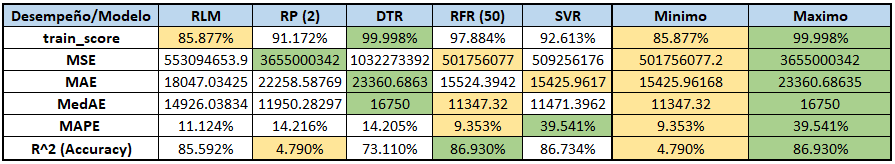

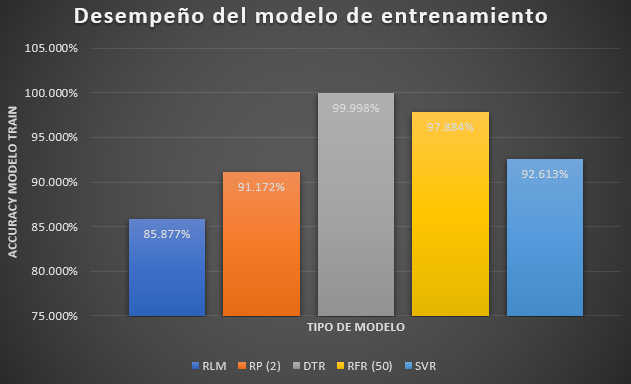

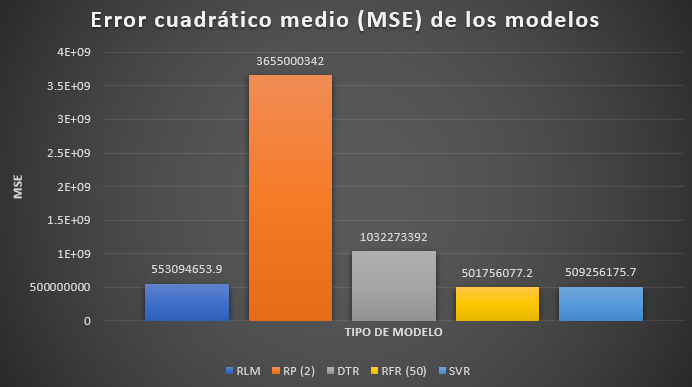

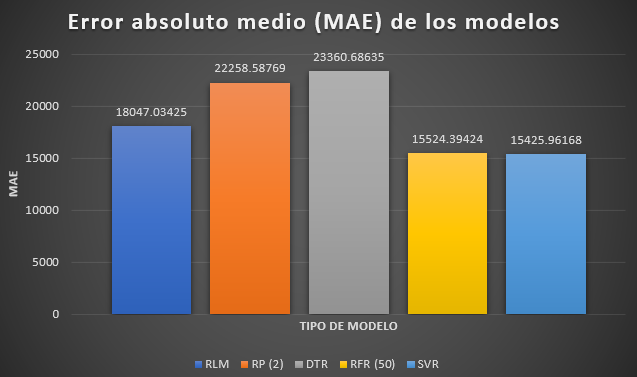

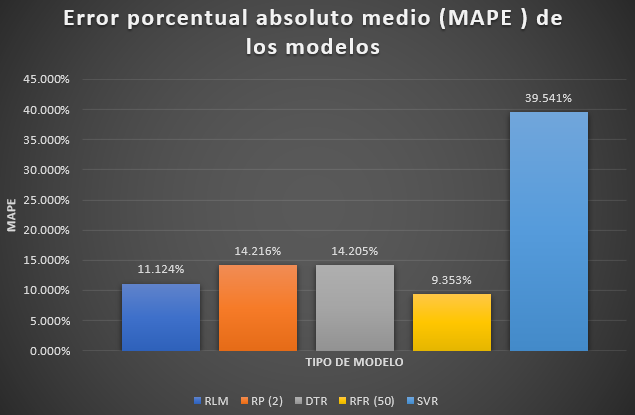

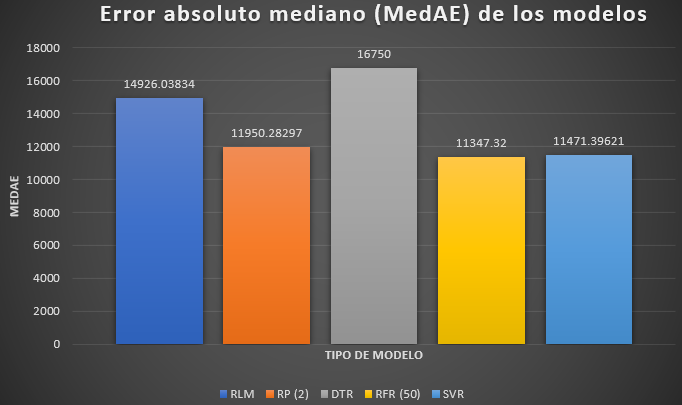

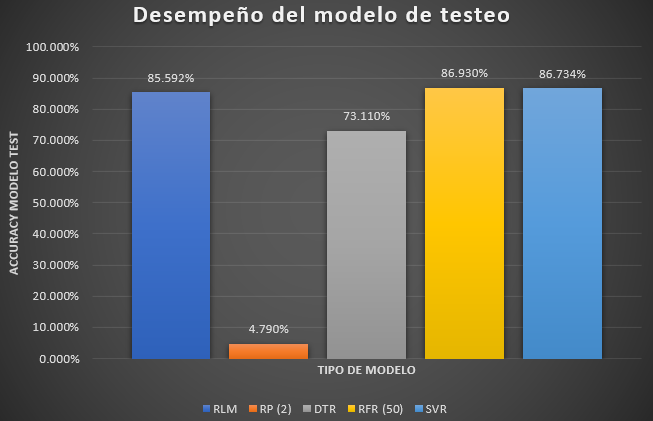